In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Project 1 - Austo Automobile

- **Austo Motor Company is a leading car manufacturer and specializes in SUV, Sedan and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.**  
<br>
<br>
- **Analysts are required to explore data and reflect on the insights.** You as an analyst have been tasked with performing a thorough analysis of the data and to come up with insights to improve the marketing campaign. 

In [2]:
df_auto = pd.read_csv('austo_automobile.csv')

## 1.1- Descriptive Data Analysis

In [3]:
df_auto.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [4]:
df_auto.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


In [5]:
df_auto.shape

(1581, 14)

In [6]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [7]:
df_auto.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1528,4,Male,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,NaN,NaN,NaN,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


## 1.2 Data Pre-Processing

### Let see the unique values and duplicacy of values to understand if we have any anomalies in the datasets

In [8]:
## To check the duplicate reords in the datasets
dups = df_auto.duplicated()
print('Number of duplicate rows is %d' % dups.sum())

df_auto[dups]

Number of duplicate rows is 0


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


#### No duplicate rows in the datasets

In [9]:
df_auto['Age'].unique()

array([53, 52, 50, 49, 47, 46, 45, 51, 54, 48, 44, 43, 42, 41, 40, 39, 38,
       37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22],
      dtype=int64)

#### The "age" values range from 22 to 53. It seems to be valid values.

In [10]:
df_auto['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

#### There are 4 unique values in the variable - Gender. It has missing values, which needs to be treated. It also has incorrectly spelled gender, it should be updated to "Female".

In [11]:
df_auto['Profession'].unique()

array(['Business', 'Salaried'], dtype=object)

#### There are 2 unique values for variable Profession - Business and Salaried. This seems to be correct data.

In [12]:
df_auto['Marital_status'].unique()

array(['Married', 'Single'], dtype=object)

#### There are 2 unique values for variable Marital_status - Married and Single. This seems to be correct data.

In [13]:
df_auto['Education'].unique()

array(['Post Graduate', 'Graduate'], dtype=object)

#### There are 2 unique values for variable Education - Post Graduate and Graduate. This seems to be correct data.

In [14]:
df_auto['No_of_Dependents'].unique()

array([4, 3, 2, 1, 0], dtype=int64)

In [15]:
df_auto[df_auto["No_of_Dependents"]==0]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
93,51,Male,Salaried,Single,Post Graduate,0,Yes,No,No,86900,0.0,86900,51000,SUV
128,47,Female,Business,Single,Graduate,0,Yes,No,No,73300,0.0,73300,50000,SUV
138,46,Female,Salaried,Single,Post Graduate,0,Yes,No,No,80200,0.0,80200,49000,SUV
203,44,NaN,Salaried,Single,Post Graduate,0,Yes,No,No,68600,0.0,68600,50000,SUV
462,36,Female,Salaried,Single,Post Graduate,0,No,No,No,67500,0.0,67500,55000,SUV
701,30,Male,Business,Single,Post Graduate,0,Yes,No,No,67000,0.0,67000,22000,Hatchback
826,29,Male,Salaried,Single,Post Graduate,0,Yes,Yes,No,62300,NaN,62300,20000,Hatchback
912,28,Male,Business,Single,Post Graduate,0,Yes,Yes,No,76600,0.0,76600,20000,Hatchback
936,28,Male,Business,Single,Post Graduate,0,No,Yes,No,66300,NaN,66300,22000,Hatchback
1020,27,Male,Salaried,Single,Post Graduate,0,No,No,No,76000,0.0,76000,23000,Hatchback


In [16]:
df_auto['No_of_Dependents']= pd.Categorical(df_auto['No_of_Dependents'])

#### There are 5 unique values for variable No_of_Dependents - 4, 3, 2, 1, 0. This seems to be correct data as the no of dependents can be zero for indivduals who are Single. We can also convert this variable as Category

In [17]:
df_auto['Personal_loan'].unique()

array(['No', 'Yes'], dtype=object)

#### There are 2 unique values for variable Personal_loan - Yes and No. This seems to be correct data.

In [18]:
df_auto['House_loan'].unique()

array(['No', 'Yes'], dtype=object)

#### There are 2 unique values for variable House_loan - Yes and No. This seems to be correct data.

In [19]:
df_auto['Partner_working'].unique()

array(['Yes', 'No'], dtype=object)

#### There are 2 unique values for variable Partner_working - Yes and No. This seems to be correct data.

In [20]:
df_auto['Make'].unique()

array(['SUV', 'Sedan', 'Hatchback'], dtype=object)

#### There are 3 unique values for variable Make - SUV, Sedan and Hatchback. This seems to be correct data.

#### Variables - Age, Profession, Marital_status, Education, No_of_Dependents, Personal_loan, House_loan, Partner_working, and Make  has no missing values

In [21]:
df_auto['Salary'] =df_auto['Salary'].astype(float)
df_auto['Total_salary'] =df_auto['Total_salary'].astype(float)

#### Changed dtype of Salary and Total_salary to float, so as to match the dtype of Partner_salary

In [22]:
df_auto[(df_auto.Salary<0)|(df_auto.Total_salary<0)|(df_auto.Partner_salary<0)|(df_auto.Price<0)]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


In [23]:
df_auto[(df_auto.Salary<1000)]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


In [24]:
df_auto[(df_auto.Total_salary<1000)]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


In [25]:
df_auto[(df_auto.Price<1000)]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


In [26]:
df_auto[(df_auto.Partner_salary==0) & (df_auto.Partner_working=='Yes')]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


In [27]:
df_auto[(df_auto.Partner_salary.isna()) & (df_auto.Partner_working=='Yes')].shape[0]

16

#### These 16 records are missing Partner_salary for Partner_working='Yes', so we need to update with formula -  Partner_salary=Total_salary-Salary

In [28]:
df_auto[(df_auto.Partner_salary==0) & (df_auto.Partner_working=='No')].shape[0]

623

In [29]:
df_auto[(df_auto.Partner_salary.isna()) & (df_auto.Partner_working=='No')].shape[0]

90

In [30]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Age               1581 non-null   int64   
 1   Gender            1528 non-null   object  
 2   Profession        1581 non-null   object  
 3   Marital_status    1581 non-null   object  
 4   Education         1581 non-null   object  
 5   No_of_Dependents  1581 non-null   category
 6   Personal_loan     1581 non-null   object  
 7   House_loan        1581 non-null   object  
 8   Partner_working   1581 non-null   object  
 9   Salary            1581 non-null   float64 
 10  Partner_salary    1475 non-null   float64 
 11  Total_salary      1581 non-null   float64 
 12  Price             1581 non-null   int64   
 13  Make              1581 non-null   object  
dtypes: category(1), float64(3), int64(2), object(8)
memory usage: 162.4+ KB


#### These 90 records for Partner_working = 'No' have missing values in the column Partner_Salary. We need to treat these missing values.

In [31]:
df_auto.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

## Insights

- Datatypes of all the variables have been used correctly. However, we understand that dtypes for No_of_Dependents is categorical in nature. So, it has been changed to Category datatype. 
- We also observe that dtype of Salary and Total_salary is int but it might be appropriate to change it to float, so as to match the dtype of Partner_salary.
- Variable "Age", "Profession", "Marital_status", "Education", "No_of_Dependents", "Personal_loan", "House_loan", "Partner_working", "Salary", "Total_salary", "Price", "Make"   has no missing values. 
- Variables "Partner_salary" and "Gender" have missing values.
- There are 16 missing records for Partner_salary for Partner_working='Yes', so these records need to be updated with formula - Partner_salary=Total_salary-Salary. 
- There are another set of 90 records for Partner_working = 'No' for which values are missing in the column Partner_Salary. These missing values needs to be treated as well.
- There are 4 unique values in the variable - Gender. It has missing values, which needs to be treated. It also has incorrectly spelled gender, it should be updated to "Female".
- For the Gender variable, we will treat the bad data and update the missing values as it will not affect the datasets central tendency. But we can’t treat the missing values in the Partner_salary as it may affect the central tendency of the datasets. So, for Partner_salary, first outlier treatment must be done and missing values should be updated.

### Treating Bad Values and missing Values in the datasets

In [32]:
df_auto['Gender'].value_counts()

Male      1199
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64

In [33]:
df_auto['Gender'].isna().sum()  ## null values in Gender variables

53

In [34]:
df_auto['Gender'].replace(to_replace='Femal', value='Female', inplace=True)
df_auto['Gender'].replace(to_replace='Femle', value='Female', inplace=True)

In [35]:
df_auto['Gender'].value_counts()

Male      1199
Female     329
Name: Gender, dtype: int64

In [36]:
df_auto['Gender'] = df_auto['Gender'].fillna(df_auto['Gender'].mode()[0])

In [37]:
df_auto['Gender'].value_counts()

Male      1252
Female     329
Name: Gender, dtype: int64

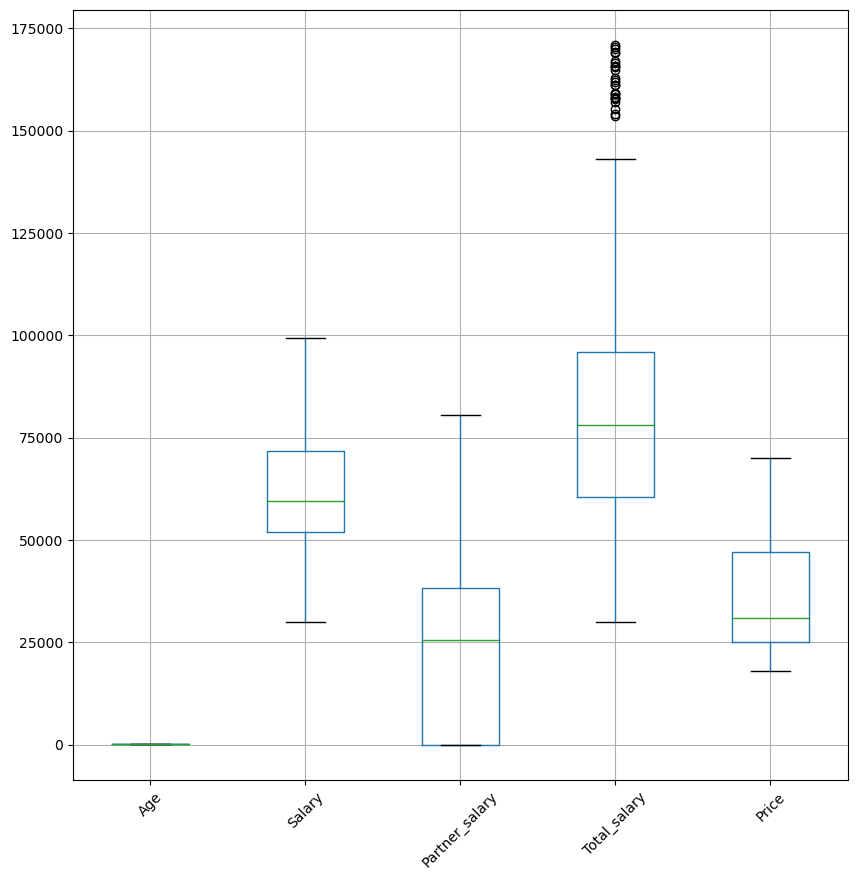

In [38]:
plt.figure(figsize=(10,10))
df_auto.boxplot()
plt.xticks(rotation = 45);

#### The outliers are present for variable - Total_Salary.
#### Although the data seems to be a valid information, it is better to treat the outlier for accuracy of our analysis.

In [39]:
def remove_outlier(cname):
    sorted(cname)
    q1, q3 = cname.quantile([0.25,0.75])
    IQR = q3-q1
    llimit = q1-(1.5 * IQR)
    hlimit = q3+(1.5 * IQR)
    return llimit, hlimit   

In [40]:
clist = ['Total_salary']
for col in clist:
    lval, hval = remove_outlier(df_auto[col])
    df_auto[col] = np.where(df_auto[col] >hval, hval, df_auto[col])
    df_auto[col] = np.where(df_auto[col] <lval, lval, df_auto[col])

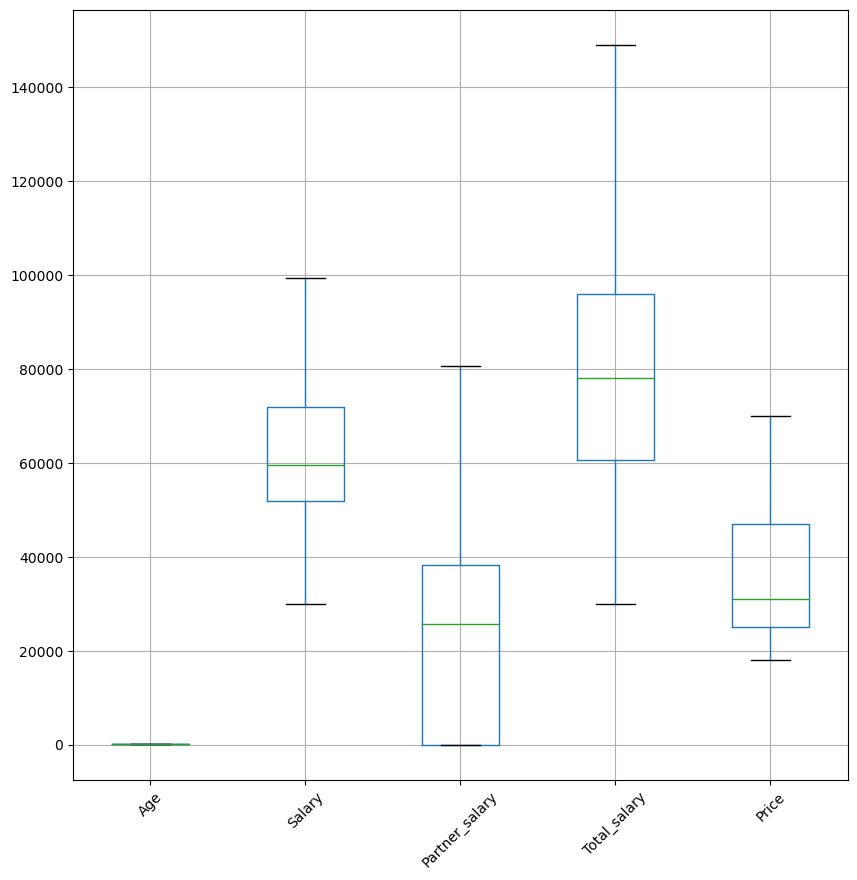

In [41]:
plt.figure(figsize=(10,10))
df_auto.boxplot()
plt.xticks(rotation = 45);

- Variable "Partner_salary" doesnot have any outlier. So, we can proceed to fill missign values

In [42]:
df_auto[(df_auto['Partner_salary'].isna()) & (df_auto['Partner_working']=='No')]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
40,53,Female,Salaried,Married,Graduate,1,Yes,No,No,72100.0,NaN,72100.0,60000,SUV
115,48,Female,Salaried,Married,Post Graduate,3,No,No,No,78000.0,NaN,78000.0,59000,SUV
163,45,Male,Salaried,Married,Post Graduate,1,Yes,Yes,No,71300.0,NaN,71300.0,42000,Sedan
164,45,Male,Business,Married,Graduate,1,Yes,No,No,56700.0,NaN,56700.0,54000,Sedan
165,45,Male,Salaried,Married,Graduate,2,No,No,No,55100.0,NaN,55100.0,65000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,22,Male,Business,Married,Post Graduate,3,Yes,No,No,52100.0,NaN,52100.0,28000,Hatchback
1567,22,Male,Salaried,Single,Graduate,0,Yes,Yes,No,39700.0,NaN,39700.0,23000,Hatchback
1568,22,Male,Salaried,Married,Graduate,3,No,Yes,No,38000.0,NaN,38000.0,23000,Sedan
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000.0,NaN,32000.0,31000,Hatchback


In [43]:
df_auto.Partner_salary=df_auto.Partner_salary.fillna(0.0)

In [44]:
df_auto[(df_auto['Partner_salary'].isna()) & (df_auto['Partner_working']=='No')]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


In [45]:
df_auto[(df_auto['Partner_salary'].isna()) & (df_auto['Partner_working']=='Yes')]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


### All the missing values have been updated to 0. But for Partner_working =='Yes', we should update the value as non zero values

In [46]:
df_auto[(df_auto['Partner_salary']==0) & (df_auto['Partner_working']=='Yes')]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
43,52,Male,Salaried,Married,Post Graduate,3,No,No,Yes,87600.0,0.0,88200.0,51000,SUV
49,52,Female,Business,Married,Post Graduate,4,No,No,Yes,90300.0,0.0,149000.0,69000,SUV
59,54,Male,Salaried,Married,Graduate,3,Yes,No,Yes,80600.0,0.0,81000.0,51000,SUV
111,48,Female,Business,Married,Graduate,3,No,No,Yes,90300.0,0.0,149000.0,62000,SUV
209,43,Female,Salaried,Married,Graduate,4,Yes,No,Yes,53400.0,0.0,123900.0,64000,SUV
284,41,Female,Business,Married,Post Graduate,2,No,No,Yes,70500.0,0.0,105800.0,33000,Sedan
339,39,Male,Salaried,Married,Post Graduate,2,Yes,No,Yes,76800.0,0.0,115400.0,50000,Sedan
376,38,Male,Salaried,Married,Post Graduate,2,Yes,No,Yes,79000.0,0.0,117400.0,46000,Sedan
424,37,Female,Salaried,Married,Graduate,2,Yes,Yes,Yes,62000.0,0.0,100700.0,46000,Sedan
444,36,Male,Business,Married,Post Graduate,2,No,No,Yes,72300.0,0.0,112400.0,48000,Sedan


In [47]:
indx_list = (df_auto['Partner_salary']==0) & (df_auto['Partner_working']=='Yes')
df_auto.loc[indx_list,'Partner_salary'] = -10
indx_list_for_update = df_auto[(df_auto['Partner_salary']==-10)].index.values
df_auto.loc[indx_list_for_update,'Partner_salary'] = df_auto.loc[indx_list_for_update,'Total_salary'] - df_auto.loc[indx_list_for_update,'Salary']
df_auto.loc[indx_list_for_update, :]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
43,52,Male,Salaried,Married,Post Graduate,3,No,No,Yes,87600.0,600.0,88200.0,51000,SUV
49,52,Female,Business,Married,Post Graduate,4,No,No,Yes,90300.0,58700.0,149000.0,69000,SUV
59,54,Male,Salaried,Married,Graduate,3,Yes,No,Yes,80600.0,400.0,81000.0,51000,SUV
111,48,Female,Business,Married,Graduate,3,No,No,Yes,90300.0,58700.0,149000.0,62000,SUV
209,43,Female,Salaried,Married,Graduate,4,Yes,No,Yes,53400.0,70500.0,123900.0,64000,SUV
284,41,Female,Business,Married,Post Graduate,2,No,No,Yes,70500.0,35300.0,105800.0,33000,Sedan
339,39,Male,Salaried,Married,Post Graduate,2,Yes,No,Yes,76800.0,38600.0,115400.0,50000,Sedan
376,38,Male,Salaried,Married,Post Graduate,2,Yes,No,Yes,79000.0,38400.0,117400.0,46000,Sedan
424,37,Female,Salaried,Married,Graduate,2,Yes,Yes,Yes,62000.0,38700.0,100700.0,46000,Sedan
444,36,Male,Business,Married,Post Graduate,2,No,No,Yes,72300.0,40100.0,112400.0,48000,Sedan


In [48]:
df_auto[(df_auto['Partner_salary']==0) & (df_auto['Partner_working']=='Yes')]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


# 1.3 Data Visualization

## 1.3.1 Univariate Analysis - Categorical Variable

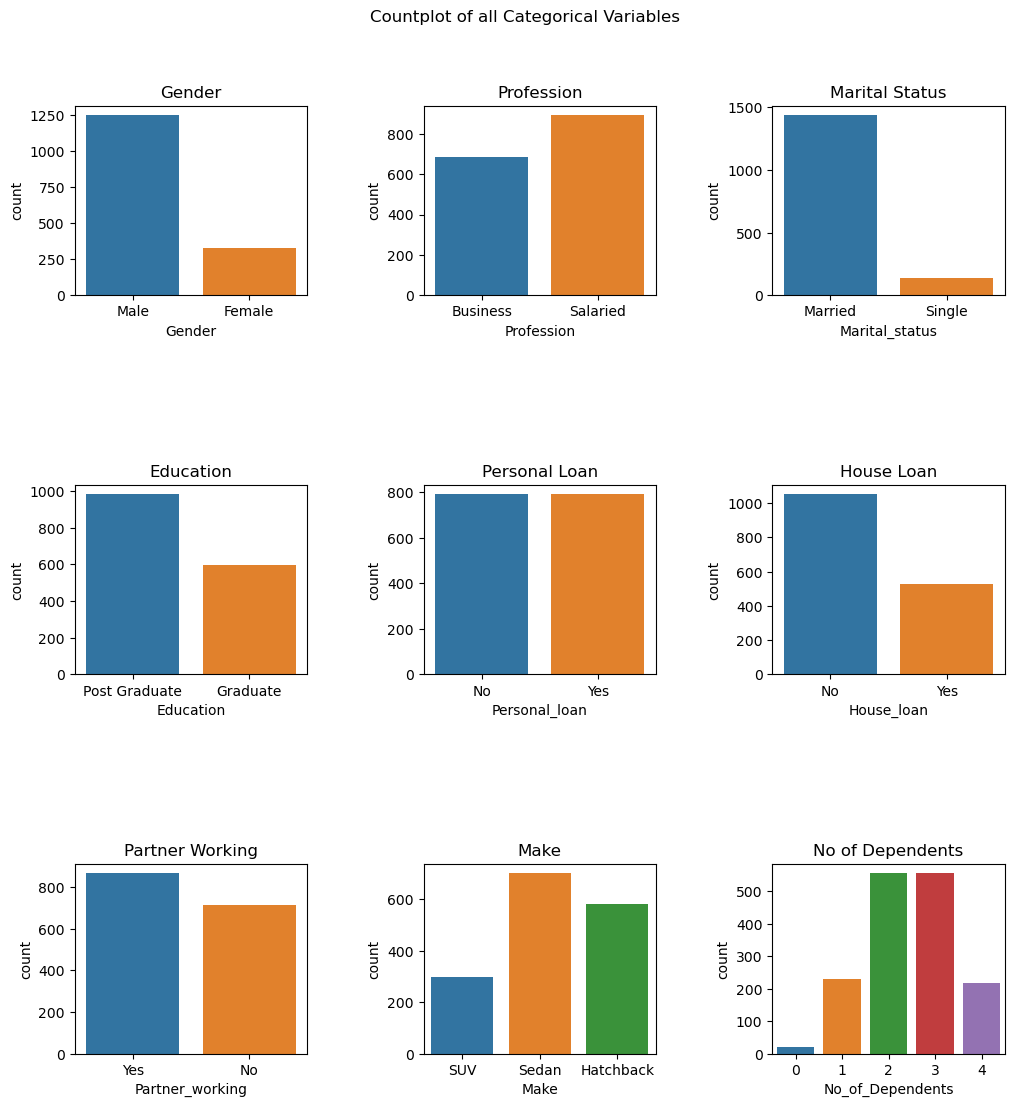

In [49]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=1, top=0.9, wspace= 0.5)
fig.suptitle('Countplot of all Categorical Variables', fontsize=12)
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)
ax7 = fig.add_subplot(3,3,7)
ax8 = fig.add_subplot(3,3,8)
ax9 = fig.add_subplot(3,3,9)

sns.countplot(data=df_auto, x='Gender', ax= ax1);
sns.countplot(data=df_auto, x='Profession', ax= ax2);
sns.countplot(data=df_auto, x='Marital_status', ax= ax3);
sns.countplot(data=df_auto, x='Education', ax= ax4);
sns.countplot(data=df_auto, x='Personal_loan', ax= ax5);
sns.countplot(data=df_auto, x='House_loan', ax= ax6);
sns.countplot(data=df_auto, x='Partner_working', ax= ax7);
sns.countplot(data=df_auto, x='Make', ax= ax8);
sns.countplot(data=df_auto, x='No_of_Dependents', ax= ax9);

ax1.title.set_text("Gender")
ax2.title.set_text("Profession")
ax3.title.set_text("Marital Status")
ax4.title.set_text("Education")
ax5.title.set_text("Personal Loan")
ax6.title.set_text("House Loan")
ax7.title.set_text("Partner Working")
ax8.title.set_text("Make")
ax9.title.set_text("No of Dependents")

## Observation

- Gender - Majority of the Indivduals are "Male". Count of Male is approx 1250, whereas count of Female is approx 320 

- Profession - Majority of indivduals are Salaried approx value is 900, whereas count of Individual who run their Businesses is approx 680.  

- Marital Status - Most of the individuals are Married approx 1400, whereas count of Single Individuals is approx 180.

- Education - Majority of individuals are Post Graduate approx 980, whereas others have Graduate level of education.

- Personal Loan - The number of individuals who has taken Personal Loan is very close to the number of individuals who has not taken Personal Loan.

- House Loan - The number of individuals who have taken house loan is much lesser than those who have not taken house loan.

- Working Partner - The number of individuals whose partner is working is slightly more than the number of individuals whose partner is not working.

- Make of Automobile - For automobile company, Sedan is the most popular make preferences among the individuals, then followed by Hatchback and SUV seems to be least preferred choice among the three.

- No of Dependents - Most of the individuals have 2 or 3 dependents while there are a few who have ZERO dependents.

## 1.3.2 Univariate Analysis - Continuous Variable

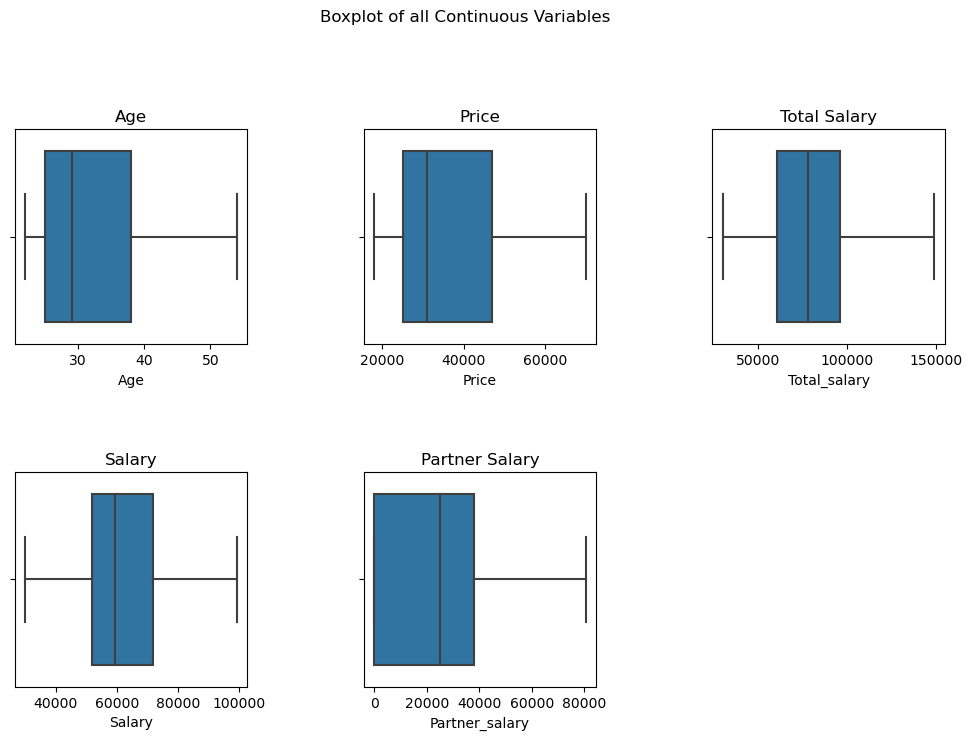

In [50]:
fig = plt.figure(figsize=(12,15))
fig.subplots_adjust(hspace=0.6, top=0.9, wspace= 0.5, bottom = 0.3)
fig.suptitle('Boxplot of all Continuous Variables', fontsize=12)
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)

sns.boxplot(data=df_auto, x = 'Age', ax= ax1);
sns.boxplot(data=df_auto, x = 'Price',  ax= ax2);
sns.boxplot(data=df_auto, x = 'Total_salary',  ax= ax3);
sns.boxplot(data=df_auto, x = 'Salary',  ax= ax4);
sns.boxplot(data=df_auto, x = 'Partner_salary',  ax= ax5);

ax1.title.set_text("Age")
ax2.title.set_text("Price")
ax3.title.set_text("Total Salary")
ax4.title.set_text("Salary")
ax5.title.set_text("Partner Salary")

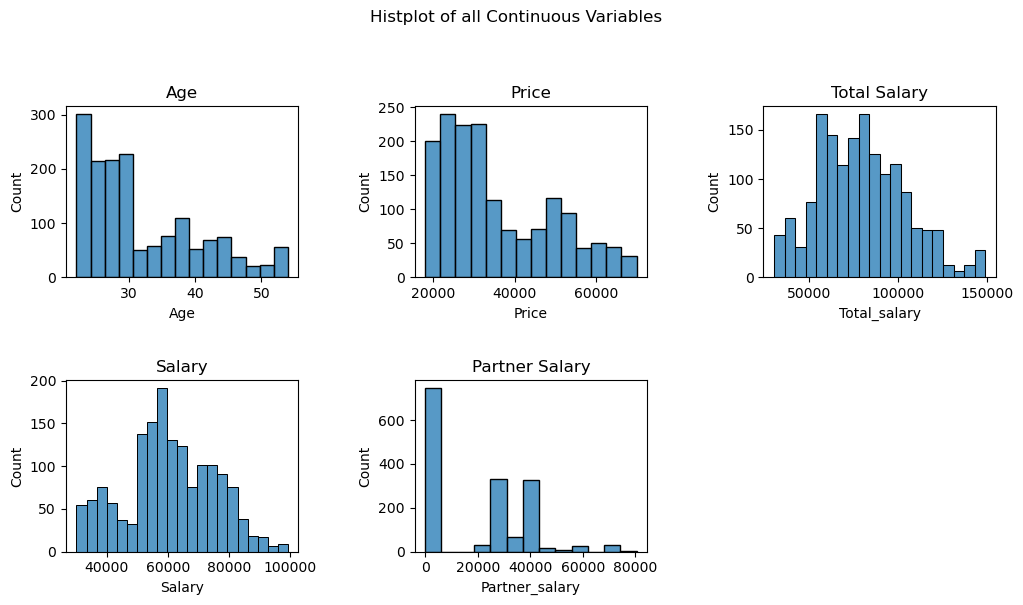

In [51]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.6, top=0.9, wspace= 0.5, bottom = 0.3)
fig.suptitle('Histplot of all Continuous Variables', fontsize=12)
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)

sns.histplot(data=df_auto, x = 'Age', ax= ax1);
sns.histplot(data=df_auto, x = 'Price',  ax= ax2);
sns.histplot(data=df_auto, x = 'Total_salary',  ax= ax3);
sns.histplot(data=df_auto, x = 'Salary',  ax= ax4);
sns.histplot(data=df_auto, x = 'Partner_salary',  ax= ax5);

ax1.title.set_text("Age")
ax2.title.set_text("Price")
ax3.title.set_text("Total Salary")
ax4.title.set_text("Salary")
ax5.title.set_text("Partner Salary")

## Observation
- AGE: From the boxplot, it is understandable that Median Age of the individuals is close to 28 years and It has some skewness in the right whiskers. The histplot suggests that datasets have more number of younger individuals (aged 30 years or lesser) than the number of people whose age is greater than 30 years.
- Price: From the boxplot, it is observed that the Median Price of the automobile is very close to 35,000 dollars. It has some skewness in the right whiskers. Also from histogram, it is observed that more numbers of individuals have purchased automobile priced less than 40,000 dollars.
- Total Salary: From boxplot, it is observed that Median Total Salary of individuals is approx 75,000 dollars, but it also has some ouliers valued greater than 150000. From histogram, it can be observed that the more than 50% of the individuals total salay falls between 50000 to 100000 dollars.
- Salary: From boxplot, it is observed that Median Salary of individuals is very close to 60,000 dollars and the plot seems to be without any skewness. The same can also be observed from histogram plot.
- Partner Salary: This field seems to be highly right skewd as it has may ZERO values. The median Partner Salary is very close to 25000 dollars.

## 1.4. Bivariate Analysis

<Figure size 600x500 with 0 Axes>

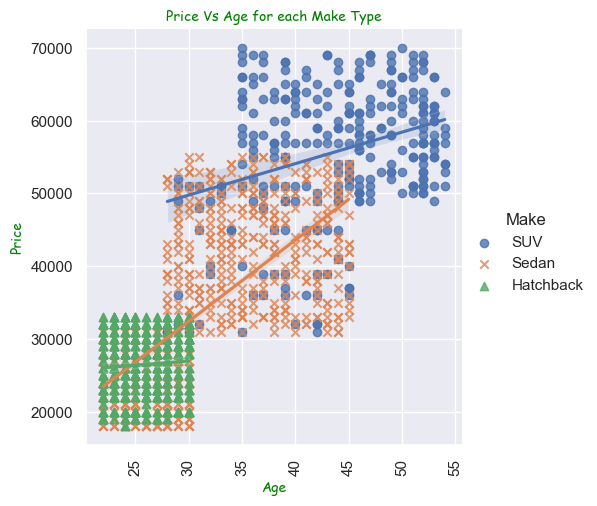

In [52]:
plt.figure(figsize=(6,5))
sns.set(font_scale=1)
font = {'family':'cursive','color':'green','size':10}
sns.lmplot(data=df_auto, x='Age', y = 'Price', hue='Make', markers=['o','x','^']);
plt.title("Price Vs Age for each Make Type",fontdict=font);
plt.xlabel("Age",fontdict=font)
plt.ylabel("Price",fontdict=font)
plt.xticks(rotation = 90)
plt.show();

### Observations
- Individuals whose age is less than 32, prefer to buy Hatchback or Sedan.
- Majority of Individuals who age between 30 and 45 buy Sedan and majority of Individuals who age more than 45 buy SUV. 

<Figure size 600x500 with 0 Axes>

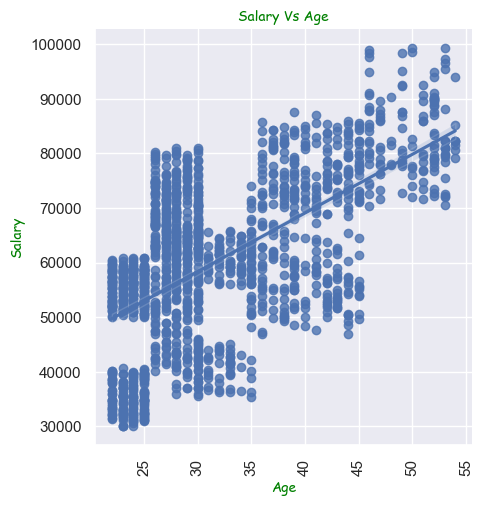

In [53]:
plt.figure(figsize=(6,5))
sns.set(font_scale=1)
font = {'family':'cursive','color':'green','size':10}
sns.lmplot(data=df_auto, x='Age', y = 'Salary');
plt.title("Salary Vs Age",fontdict=font);
plt.xlabel("Age",fontdict=font)
plt.ylabel("Salary",fontdict=font)
plt.xticks(rotation = 90)
plt.show();

### Observations
- Individuals Salary increases with age. There is some significant correlation between Age and Salary.

<Figure size 600x500 with 0 Axes>

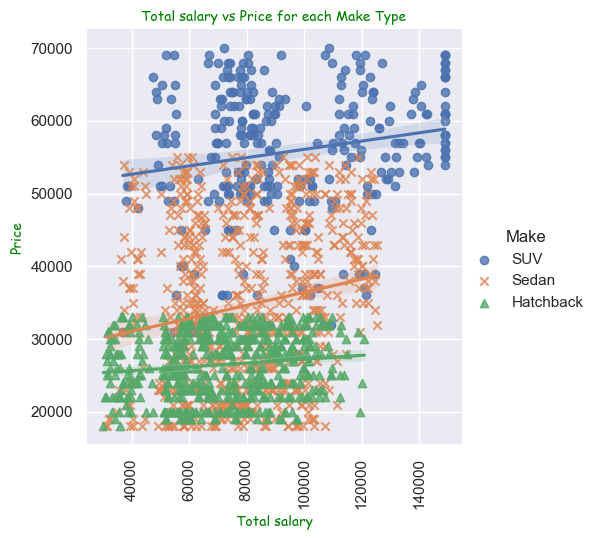

In [54]:
plt.figure(figsize=(6,5))
sns.set(font_scale=1)
font = {'family':'cursive','color':'green','size':10}
sns.lmplot(data=df_auto, x='Total_salary', y = 'Price', hue='Make', markers=['o','x','^']);
plt.title("Total salary vs Price for each Make Type",fontdict=font);
plt.xlabel("Total salary",fontdict=font)
plt.ylabel("Price",fontdict=font)
plt.xticks(rotation = 90)
plt.show();

### Observations
- Total Salary doesn't have strong relation with the Price of the cars that one purchases. There are some individuals purchasing the SUV cars, even though their Total Salary is less than 100000 dollars.

<Figure size 600x500 with 0 Axes>

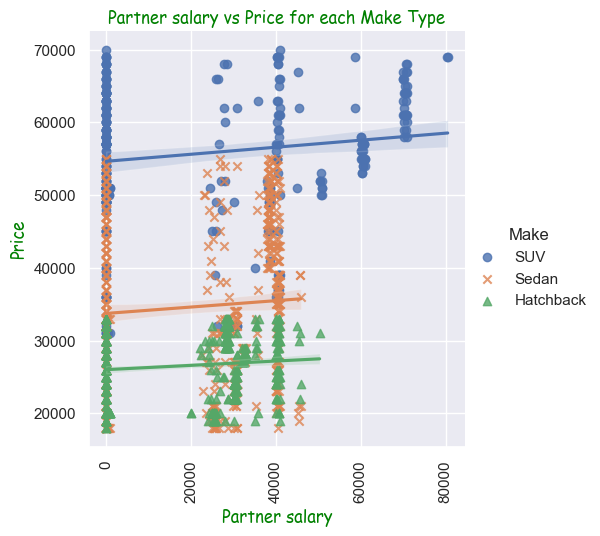

In [107]:
plt.figure(figsize=(6,5))
sns.set(font_scale=1)
font = {'family':'cursive','color':'green','size':12}
sns.lmplot(data=df_auto, x='Partner_salary', y = 'Price', hue='Make', markers=['o','x','^']);
plt.title("Partner salary vs Price for each Make Type",fontdict=font);
plt.xlabel("Partner salary",fontdict=font)
plt.ylabel("Price",fontdict=font)
plt.xticks(rotation = 90)
plt.show();

### Observations
- Partner Salary doesn't have strong relation with the Price of the cars that one purchases. There are some individuals purchasing the SUV cars, even though their Partner's Salary is less than Zero dollars.

<Figure size 600x500 with 0 Axes>

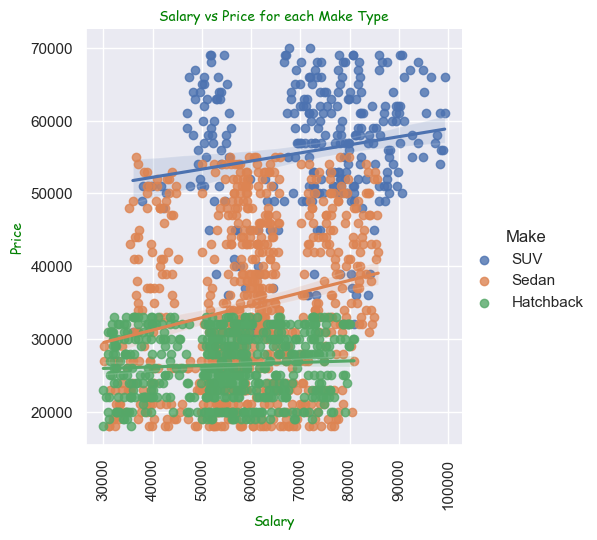

In [56]:
plt.figure(figsize=(6,5))
sns.set(font_scale=1)
font = {'family':'cursive','color':'green','size':10}
sns.lmplot(data=df_auto, x='Salary', y = 'Price', hue='Make');
plt.title("Salary vs Price for each Make Type",fontdict=font);
plt.xlabel("Salary",fontdict=font)
plt.ylabel("Price",fontdict=font)
plt.xticks(rotation = 90)
plt.show();

### Observations
- Salary doesn't have strong relation with the Price of the cars that one purchases. There are some individuals purchasing the SUV cars, even though their Salary is less than 100000 dollars.

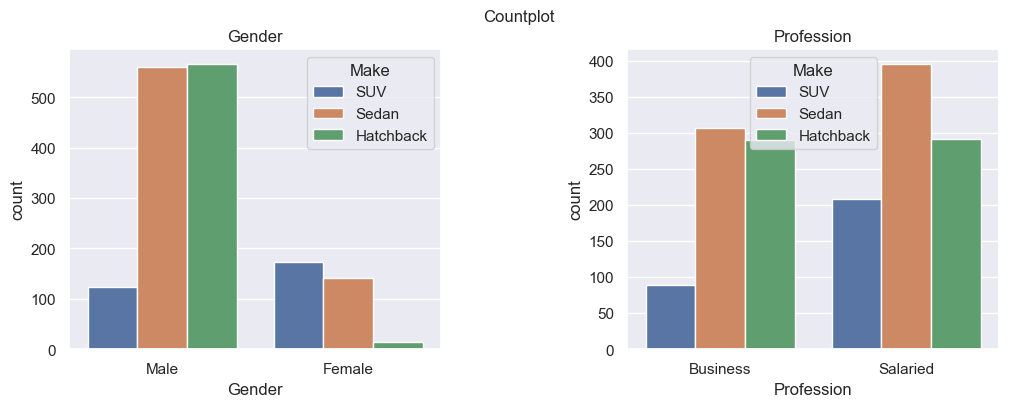

In [57]:
fig = plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=0.6, top=0.9, wspace= 0.5, bottom = 0.3)
fig.suptitle('Countplot', fontsize=12)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.countplot(data=df_auto, x = 'Gender', hue='Make', ax= ax1,);
sns.countplot(data=df_auto, x = 'Profession', hue='Make',  ax= ax2);

ax1.title.set_text("Gender")
ax2.title.set_text("Profession")

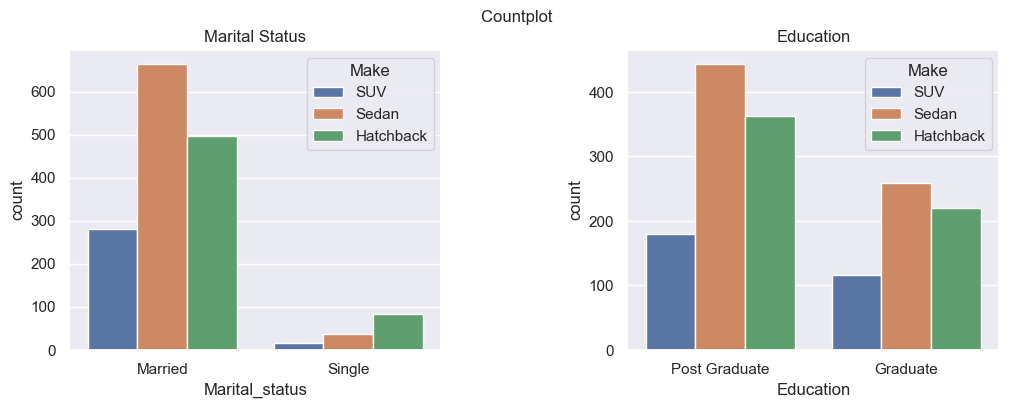

In [58]:
fig = plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=0.6, top=0.9, wspace= 0.5, bottom = 0.3)
fig.suptitle('Countplot ', fontsize=12)
ax3 = fig.add_subplot(1,2,1)
ax4 = fig.add_subplot(1,2,2)

sns.countplot(data=df_auto, x = 'Marital_status', hue='Make',  ax= ax3);
sns.countplot(data=df_auto, x = 'Education', hue='Make', ax= ax4);

ax3.title.set_text("Marital Status")
ax4.title.set_text("Education")

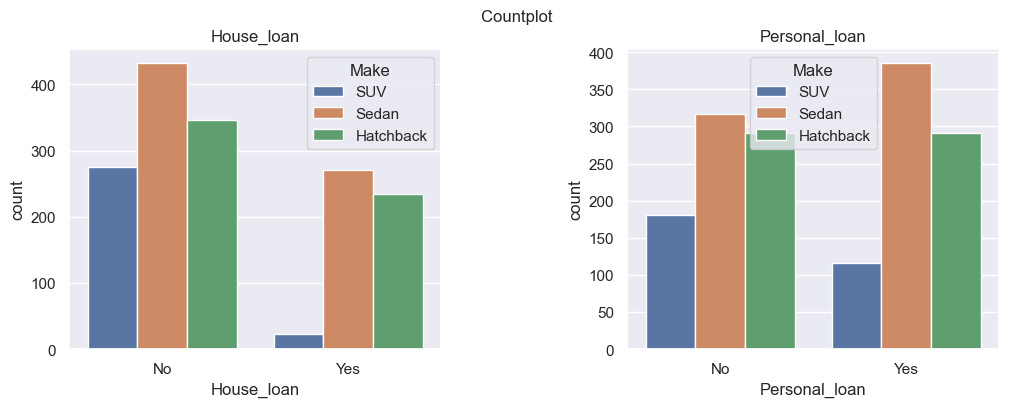

In [59]:
fig = plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=0.6, top=0.9, wspace= 0.5, bottom = 0.3)
fig.suptitle('Countplot ', fontsize=12)
ax5 = fig.add_subplot(1,2,1)
ax6 = fig.add_subplot(1,2,2)

sns.countplot(data=df_auto, x = 'House_loan', hue='Make', ax= ax5);
sns.countplot(data=df_auto, x = 'Personal_loan', hue='Make', ax= ax6);

ax5.title.set_text("House_loan")
ax6.title.set_text("Personal_loan")

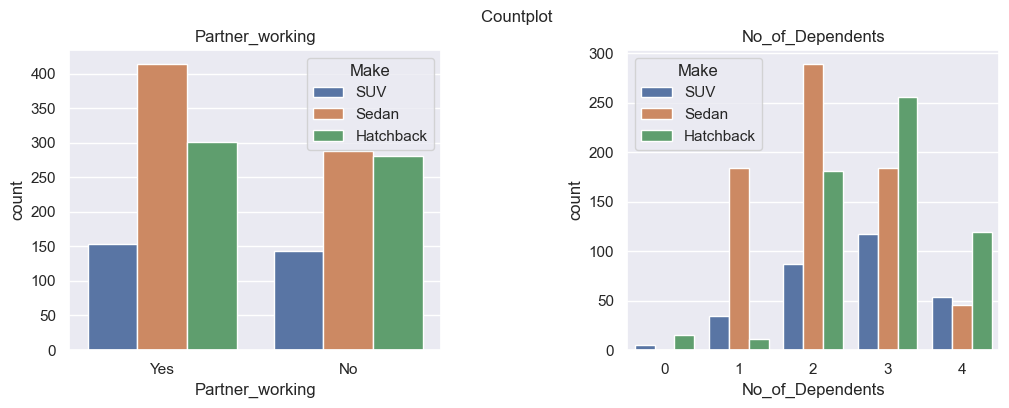

In [60]:
fig = plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=0.6, top=0.9, wspace= 0.5, bottom = 0.3)
fig.suptitle('Countplot ', fontsize=12)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.countplot(data=df_auto, x = 'Partner_working', hue='Make', ax= ax1,);
sns.countplot(data=df_auto, x = 'No_of_Dependents', hue='Make',  ax= ax2);

ax1.title.set_text("Partner_working")
ax2.title.set_text("No_of_Dependents")

### Observations
- SUV is the most popular choice for Females, whereas Sedan and Hatchback is equally popular among males.
- For Salaried professional, Sedan is the most prefered choice of automobile and for Business professionals, Sedan and Hatchback is almost equally preferred choice
- Preference of automobile for Married indivduals is Sedan then followed by Hatchback. SUV is the least preferred option although the number of individuals bought SUV is also in good numbers.
- Choice of preference of Make of car is similar for both Post Graduate and Graduates. Most number of people prefer Sedan, then Hatchback and then followed by SUV.
- Sedan and Hatchback is the popular choice among individuals irrespective to the fact whether they have taken House Loan or not and very few in numbers seems to have purchased SUV.
- Majority of the indivduals prefer Sedan and Hatchback irrespective of the fact whether they have taken Personal loan or not. 
- For individuals whose partner is working, the trends of preference of car make seems to continue- Sedan and Hatch back is among the popular choice irrespective of the fact whether Partner is working or not.
- The choice of make seems to change as with the no of dependents. For No of dependent with 1 and 2 - Sedan is the prefered choice, whereas for no of dependents 3 and 4 - Hatchback seems to be preferred choice.
- We can observe similar trends in the crosstab below

In [61]:
pd.crosstab(df_auto['Gender'],df_auto['Personal_loan'])

Personal_loan,No,Yes
Gender,,
Female,180,149
Male,609,643


In [62]:
pd.crosstab(df_auto['Gender'],df_auto['Personal_loan'],
            normalize=True).style.format('{:.2%}')

Personal_loan,No,Yes
Gender,,
Female,11.39%,9.42%
Male,38.52%,40.67%


In [63]:
pd.crosstab([df_auto['Partner_working']],[df_auto['Gender']],margins=True, margins_name='Subtotal')

Gender,Female,Male,Subtotal
Partner_working,,,
No,151,562,713
Yes,178,690,868
Subtotal,329,1252,1581


In [64]:
pd.crosstab([df_auto['Education']],[df_auto['Gender']],margins=True, margins_name='Subtotal')

Gender,Female,Male,Subtotal
Education,,,
Graduate,138,458,596
Post Graduate,191,794,985
Subtotal,329,1252,1581


In [65]:
pd.crosstab([df_auto['House_loan']],[df_auto['Gender']],margins=True, margins_name='Subtotal')

Gender,Female,Male,Subtotal
House_loan,,,
No,244,810,1054
Yes,85,442,527
Subtotal,329,1252,1581


In [66]:
pd.crosstab([df_auto['Personal_loan']],[df_auto['Gender']],margins=True, margins_name='Subtotal')

Gender,Female,Male,Subtotal
Personal_loan,,,
No,180,609,789
Yes,149,643,792
Subtotal,329,1252,1581


#### 1.5.1  Employees working on the existing marketing campaign have made the following remarks. Based on the data and your analysis state whether you agree or disagree with their observations. Justify your answer Based on the data available

#### 1.5.1.	Steve Roger says “Men prefer SUV by a large margin, compared to the women

In [74]:
pd.crosstab([df_auto['Make']],[df_auto['Gender']],margins=True, margins_name='Subtotal')

Gender,Female,Male,Subtotal
Make,,,
Hatchback,15,567,582
SUV,173,124,297
Sedan,141,561,702
Subtotal,329,1252,1581


- The dataset doesn’t show that statement is correct. As per data, Women seems to have more preference towards SUV than Men

#### 1.5.2.	Ned Stark believes that a salaried person is more likely to buy a Sedan.

In [68]:
pd.crosstab([df_auto['Profession']],[df_auto['Make']], margins=True, margins_name='SubTotal')

Make,Hatchback,SUV,Sedan,SubTotal
Profession,,,,
Business,290,89,306,685
Salaried,292,208,396,896
SubTotal,582,297,702,1581


- Yes, the dataset does show that a salaried person is more likely to buy a Sedan

#### 1.5.3.	Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.

In [69]:
pd.crosstab([df_auto['Profession'],df_auto['Gender']],[df_auto['Make']],margins=True, margins_name='Subtotal')

Make               Hatchback  SUV  Sedan  Subtotal
Profession Gender                                 
Business   Female          0   55     50       105
           Male          290   34    256       580
Salaried   Female         15  118     91       224
           Male          277   90    305       672
Subtotal                 582  297    702      1581

- The dataset shows that Salaried male is an easier target for a Sedan Sale but not for a SUV Sale

## Multi Variate Analysis

In [71]:
df_auto.corr()

,Age,Salary,Partner_salary,Total_salary,Price
Age,1.000000,0.616899,0.133674,0.452844,0.797831
Salary,0.616899,1.000000,0.085185,0.638625,0.409920
Partner_salary,0.133674,0.085185,1.000000,0.818406,0.169886
Total_salary,0.452844,0.638625,0.818406,1.000000,0.359651
Price,0.797831,0.409920,0.169886,0.359651,1.000000


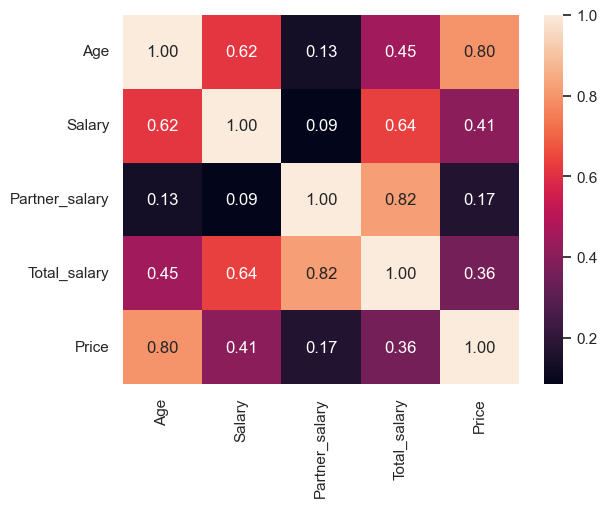

In [72]:
sns.heatmap(df_auto.corr(), annot=True, fmt='0.2f');

## Observations
- Age has strong correlation with Price - 0.80
- Partner Salary and Total Salary has very high correlation - 0.81
- Total Salary has medium correlation with Salary - 0.64
- Other variables don't show a strong correlation.
- The same observation can be seen in pairplot.

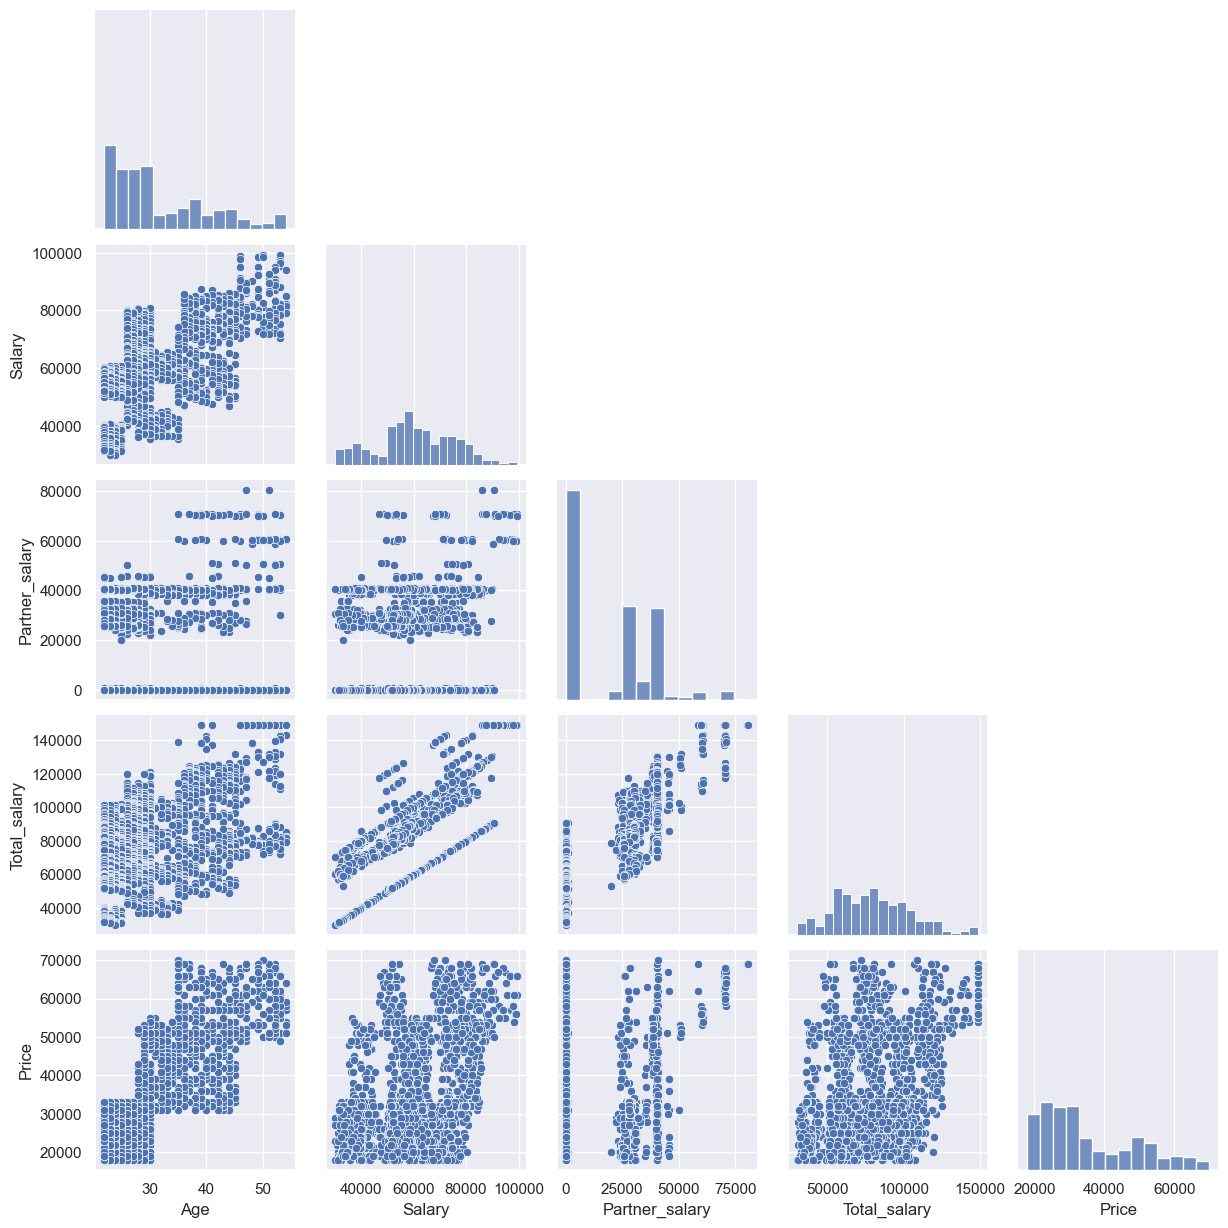

In [73]:
sns.pairplot(df_auto,corner=True);

# Insights
- Individuals whose age is less than 32, prefer to buy Hatchback or Sedan.
- Majority of Individuals who age between 30 and 45 buy Sedan and majority of Individuals who age more than 45 buy SUV. 
- Individuals Salary increases with age. There is some significant correlation between Age and Salary.
- Total Salary doesn't have strong relation with the Price of the cars that one purchases. There are some individuals purchasing the SUV cars, even though their Total Salary is less than 100000 dollars.
- Partner Salary doesn't have strong relation with the Price of the cars that one purchases. There are some individuals purchasing the SUV cars, even though their Partner's Salary is Zero dollars.
- Salary doesn't have strong relation with the Price of the cars that one purchases. There are some individuals purchasing the SUV cars, even though their Salary is less than 100000 dollars.
- SUV is the most popular choice for Females, whereas Sedan and Hatchback is equally popular among males.
- For Salaried professional, Sedan is the most prefered choice of automobile and for Business professionals, Sedan and Hatchback is almost equally preferred choice
- Preference of automobile for Married indivduals is Sedan then followed by Hatchback. SUV is the least preferred option although the number of individuals bought SUV is also in good numbers.
- Choice of preference of Make of car is similar for both Post Graduate and Graduates. Most number of people prefer Sedan, then Hatchback and then followed by SUV.
- Sedan and Hatchback is the popular choice among individuals irrespective to the fact whether they have taken House Loan or not and very few in numbers seems to have purchased SUV.
- Majority of the indivduals prefer Sedan and Hatchback irrespective of the fact whether they have taken Personal loan or not.
- For individuals whose partner is working, the trends of preference of car make seems to continue- Sedan and Hatch back is among the popular choice irrespective of the fact whether Partner is working or not.
- The choice of make seems to change as with the no of dependents. When number of dependents are 1 or 2 - Sedan is the prefered choice, whereas when number of dependents are 3 and 4 - Hatchback seems to be preferred choice.

### 1.6. From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a business can utilize the results from this exercise.  Give justification along with presenting metrics/charts used for arriving at the conclusions.
- Gender
- Personal_loan


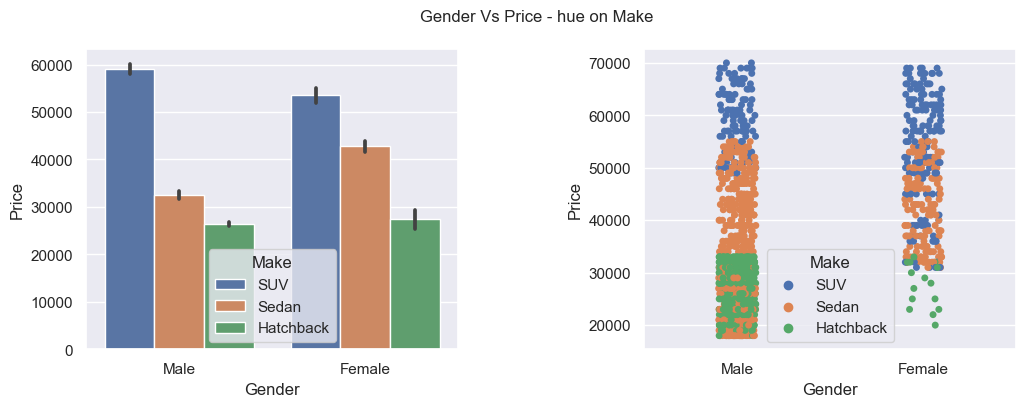

In [104]:
fig = plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=0.6, top=0.9, wspace= 0.5, bottom = 0.3)
fig.suptitle('Gender Vs Price - hue on Make', fontsize=12)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.barplot(data=df_auto, x = 'Gender', y= 'Price', hue='Make',ax= ax1);
sns.stripplot(data=df_auto, x = 'Gender', y= 'Price', jitter=True, hue='Make',ax= ax2);
##sns.countplot(data=df_auto, x = 'No_of_Dependents', hue='Make',  ax= ax2);

##ax1.title.set_text("Gender Vs Price")
##ax2.title.set_text("Gender Vs Price")

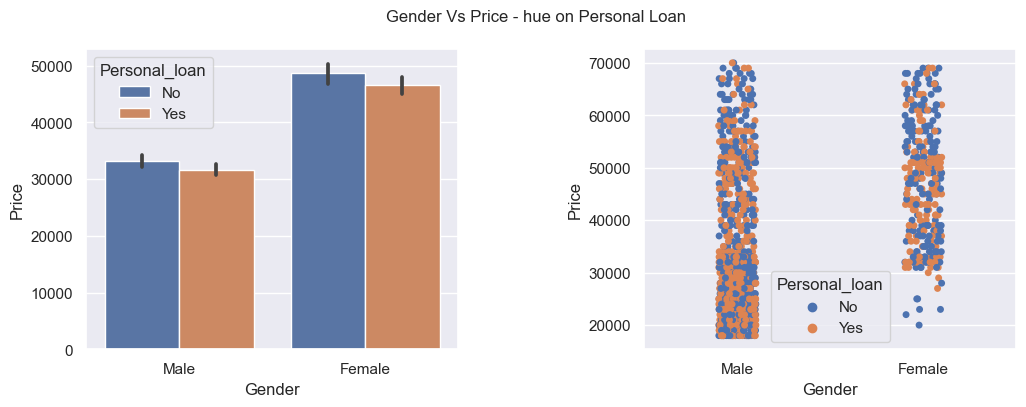

In [105]:
fig = plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=0.6, top=0.9, wspace= 0.5, bottom = 0.3)
fig.suptitle('Gender Vs Price - hue on Personal Loan', fontsize=12)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.barplot(data=df_auto, x = 'Gender', y= 'Price', estimator='mean', hue='Personal_loan',ax= ax1);
sns.stripplot(data=df_auto, x = 'Gender', y= 'Price', jitter=True, hue='Personal_loan',ax= ax2);

In [70]:
pd.crosstab([df_auto['Personal_loan'],df_auto['Gender']],[df_auto['Make']], margins=True, margins_name='Subtotal')

Make                  Hatchback  SUV  Sedan  Subtotal
Personal_loan Gender                                 
No            Female         10  101     69       180
              Male          281   80    248       609
Yes           Female          5   72     72       149
              Male          286   44    313       643
Subtotal                    582  297    702      1581

In [97]:
pd.crosstab([df_auto['Personal_loan'],df_auto['Gender']],[df_auto['Make']],values=df_auto['Price'],
            aggfunc='sum')

Make                  Hatchback      SUV     Sedan
Personal_loan Gender                              
No            Female     262000  5577000   2923000
              Male      7503000  4796000   7929000
Yes           Female     150000  3675000   3108000
              Male      7493000  2532000  10332000

In [106]:
pd.crosstab([df_auto['Personal_loan'],df_auto['Gender']],[df_auto['Make']],values=df_auto['Price'],
            aggfunc='mean')

Make                     Hatchback           SUV         Sedan
Personal_loan Gender                                          
No            Female  26200.000000  55217.821782  42362.318841
              Male    26701.067616  59950.000000  31971.774194
Yes           Female  30000.000000  51041.666667  43166.666667
              Male    26199.300699  57545.454545  33009.584665

### Observations
- Females who have no Personal loans prefer SUV more than the Females who have Personal loans.
- Males prefer to buy Hatchback or Sedan irrespective of whether they took Personal Loan or not.
- So, business can target Females who doesn't have any Personal loans to sell SUV car.
- Business can target males to sell Sedan or Hatchback car.

### 1.7. From the current data set comment if having a working partner leads to purchase of a higher priced carb

<Figure size 600x500 with 0 Axes>

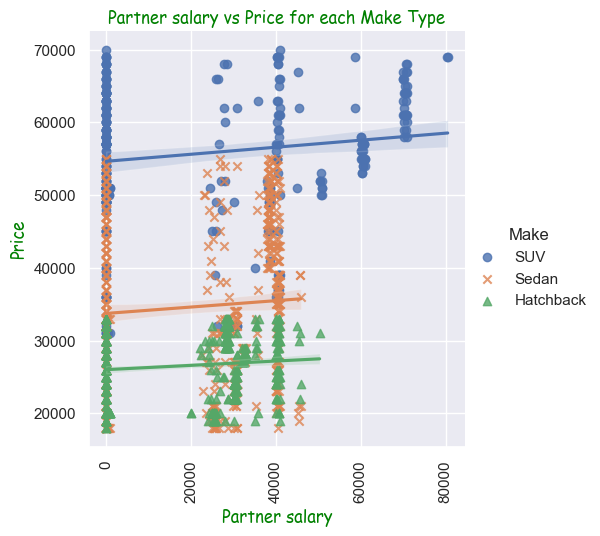

In [107]:
plt.figure(figsize=(6,5))
sns.set(font_scale=1)
font = {'family':'cursive','color':'green','size':12}
sns.lmplot(data=df_auto, x='Partner_salary', y = 'Price', hue='Make', markers=['o','x','^']);
plt.title("Partner salary vs Price for each Make Type",fontdict=font);
plt.xlabel("Partner salary",fontdict=font)
plt.ylabel("Price",fontdict=font)
plt.xticks(rotation = 90)
plt.show();

### Observation
- Partner Salary doesn't seem to have any significant impact on the purchase of a higher priced car. There are individuals whose Partner is not working, but they have purchased high priced car as well.
- If we look at heatmap, it states there is 0.17 correlation of Partner Salary to lead to purchase of high priced car.

### 1.8 The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use Gender and Marital_status - fields to arrive at groups with similar purchase history

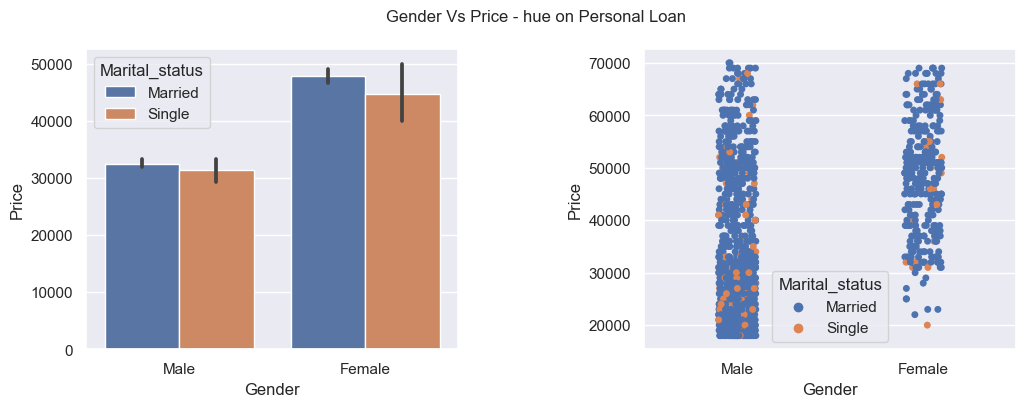

In [111]:
fig = plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=0.6, top=0.9, wspace= 0.5, bottom = 0.3)
fig.suptitle('Gender Vs Price - hue on Personal Loan', fontsize=12)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.barplot(data=df_auto, x = 'Gender', y= 'Price', estimator='mean', hue='Marital_status',ax= ax1);
sns.stripplot(data=df_auto, x = 'Gender', y= 'Price', jitter=True, hue='Marital_status',ax= ax2);

In [121]:
pd.crosstab([df_auto['Marital_status'],df_auto['Gender']],[df_auto['Make']], normalize=True).style.format('{:.2%}')

### Observations:
- Married Female prefer to purchase SUV more than any other car irrespective of Personal_loan and Education Background.
- Married Male prefer to purchase Sedan and Single Male prefer Hatchback irrespective of Personal_loan and Education Background.

# Project 2.1 - GoDigit CC

**Analyse the dataset and list down the top 5 important variables, along with the business justifications. (10 Points) (Context and the Data Dictionary is as below)**
<br>
<br>

**CONTEXT:**
A bank can generate revenue in a variety of ways, such as charging interest, transaction fees and financial advice. Interest charged on the capital that the bank lends out to customers has historically been the most significant method of revenue generation. The bank earns profits from the difference between the interest rates it pays on deposits and other sources of funds, and the interest rates it charges on the loans it gives out. 
<br>
<br>

GODIGT Bank is a mid-sized private bank that deals in all kinds of banking products, such as savings accounts, current accounts, investment products, etc. among other offerings. The bank also cross-sells asset products to its existing customers through personal loans, auto loans, business loans, etc., and to do so they use various communication methods including cold calling, e-mails, recommendations on net banking, mobile banking, etc. 
<br>
<br>
GODIGT Bank also has a set of customers who were given credit cards based on risk policy and customer category class but due to huge competition in the credit card market, the bank is observing high attrition in credit card spending. The bank makes money only if customers spend more on the credit cards. Given the attrition, the Bank wants to revisit its credit card policy and make sure that the card given to the customer is the right credit card. The bank will make profit only through the customers that show higher intent towards a recommended credit card. (Higher intent means consumers would want to use the card and hence not be attrite.) 


In [126]:
df_cc = pd.read_excel('godigt_cc_data.xlsx')

In [127]:
pd.set_option('display.max_columns', None)

In [151]:
df_cc.head()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,cc_active30,cc_active60,cc_active90,hotlist_flag,widget_products,engagement_products,annual_income_at_source,other_bank_cc_holding,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,0,0,0,N,1,3,1552111,Y,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,0,0,0,N,4,1,4833871,Y,52,0,0,0,0,0,R,280854,Salaried,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,0,0,0,N,4,2,1345429,N,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,1,1,1,N,6,0,880560,N,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,0,1,1,N,4,3,1808582,N,21,1,0,0,0,0,T,38108,Salaried,220000


In [129]:
df_cc.tail()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,cc_active30,cc_active60,cc_active90,hotlist_flag,widget_products,engagement_products,annual_income_at_source,other_bank_cc_holding,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
8443,8444,4262 41XX XXXX XXXX,426241,Visa,chartered,2010-01-10,A,1,1,1,0,0,0,N,1,0,3617288,N,47,0,0,0,0,0,T,108713,0,970000
8444,8445,37691 6XXXX XXXXX,376916,Amex,centurion,2006-07-19,A,0,1,1,0,1,1,N,7,4,3661676,N,52,0,0,0,0,0,T,42369,Salaried,200000
8445,8446,4375 51XX XXXX XXXX,437551,Visa,rewards,2006-02-15,D,0,1,1,0,0,0,N,3,0,1274059,Y,36,0,0,0,0,0,T,8459,Retired,90000
8446,8447,4477 47XX XXXX XXXX,447747,Visa,indianoil,2003-11-06,C,0,0,0,0,0,0,N,3,0,1271148,N,54,1,0,0,0,0,T,57100,Salaried,210000
8447,8448,4262 41XX XXXX XXXX,426241,Visa,rewards,2013-01-13,D,0,1,1,0,0,0,N,1,1,1329756,Y,37,0,0,0,0,0,T,45244,Retired,130000


In [130]:
df_cc.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

In [131]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [132]:
df_cc['Occupation_at_source'].unique()

array(['Self Employed', 0, 'Student', 'Salaried', 'Retired', 'Housewife'],
      dtype=object)

#### We have a bad data "0" in the variable - Occupation_at_source. This needs to be treated.

In [133]:
df_cc['other_bank_cc_holding'].unique()

array(['Y', 'N'], dtype=object)

In [134]:
df_cc['hotlist_flag'].unique()

array(['N', 'Y'], dtype=object)

In [135]:
df_cc['high_networth'].unique()

array(['B', 'A', 'C', 'E', 'D'], dtype=object)

In [136]:
df_cc['Issuer'].unique()

array(['Visa', 'Mastercard', 'Amex'], dtype=object)

In [137]:
df_cc['card_type'].unique()

array(['edge', 'prosperity', 'rewards', 'indianoil', 'cashback',
       'shoprite', 'chartered', 'aura', 'gold', 'smartearn', 'prime',
       'pulse', 'platinum', 'centurion', 'elite'], dtype=object)

In [138]:
df_cc['Transactor_revolver'].unique()

array(['T', 'R', nan], dtype=object)

#### We have missing values in the field which needs to be treated

## Treating Bad Values and Missing values

In [139]:
df_cc['Occupation_at_source'].value_counts()

Salaried         3918
Self Employed    2175
Retired          1089
Student           621
Housewife         384
0                 261
Name: Occupation_at_source, dtype: int64

In [142]:
df_cc['Occupation_at_source'].mode()[0]

'Salaried'

In [143]:
df_cc['Occupation_at_source'].replace(to_replace=0, value=df_cc['Occupation_at_source'].mode()[0], inplace=True)

In [144]:
df_cc['Occupation_at_source'].value_counts()

Salaried         4179
Self Employed    2175
Retired          1089
Student           621
Housewife         384
Name: Occupation_at_source, dtype: int64

#### Replaced '0' in 'Occupation_at_source' variables in the dataset.

In [145]:
df_cc['Transactor_revolver'].value_counts()

T    7115
R    1295
Name: Transactor_revolver, dtype: int64

In [146]:
df_cc['Transactor_revolver'].mode()[0]

'T'

In [147]:
df_cc['Transactor_revolver'] = df_cc['Transactor_revolver'].fillna(df_cc['Transactor_revolver'].mode()[0])

In [148]:
df_cc['Transactor_revolver'].value_counts()

T    7153
R    1295
Name: Transactor_revolver, dtype: int64

#### Replaced missing values in the Transactor_revolver to 'T'

### Box plot to find out the Outlier

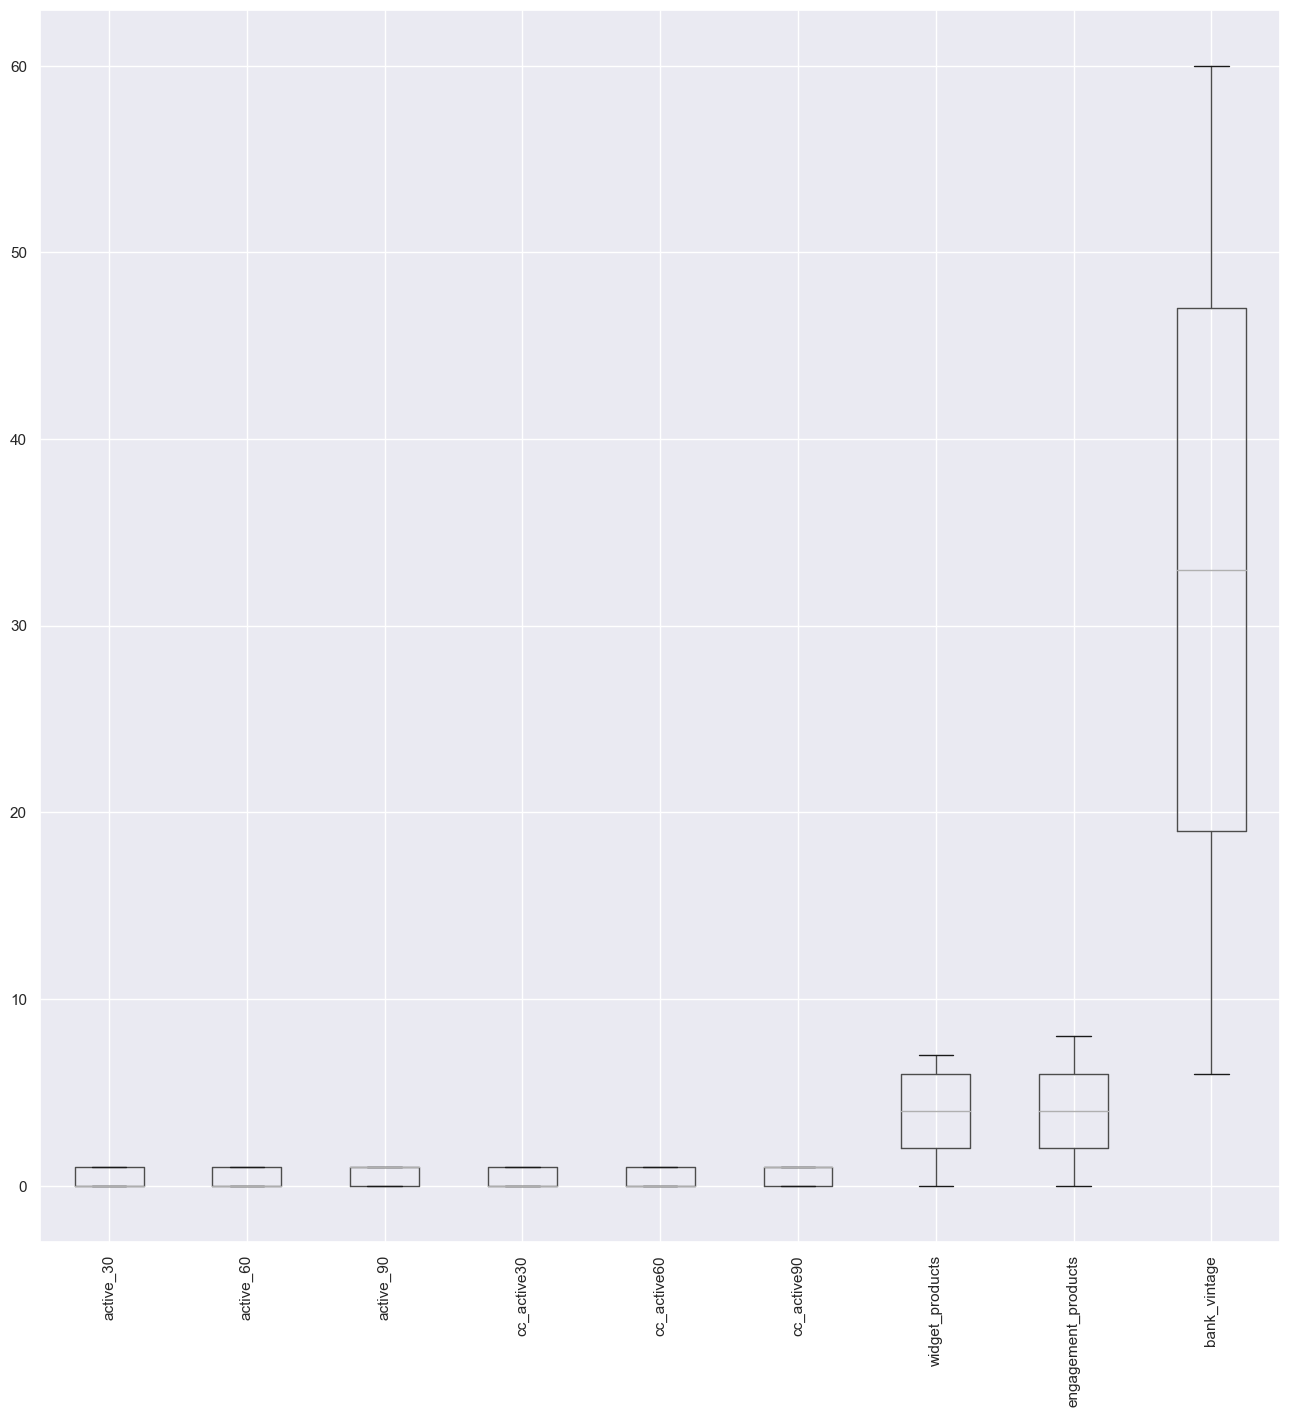

In [149]:
plt.figure(figsize=(16,16))
df_cc.boxplot(column=['active_30','active_60','active_90','cc_active30','cc_active60','cc_active90','widget_products','engagement_products','bank_vintage'])
plt.xticks(rotation=90)
plt.show()

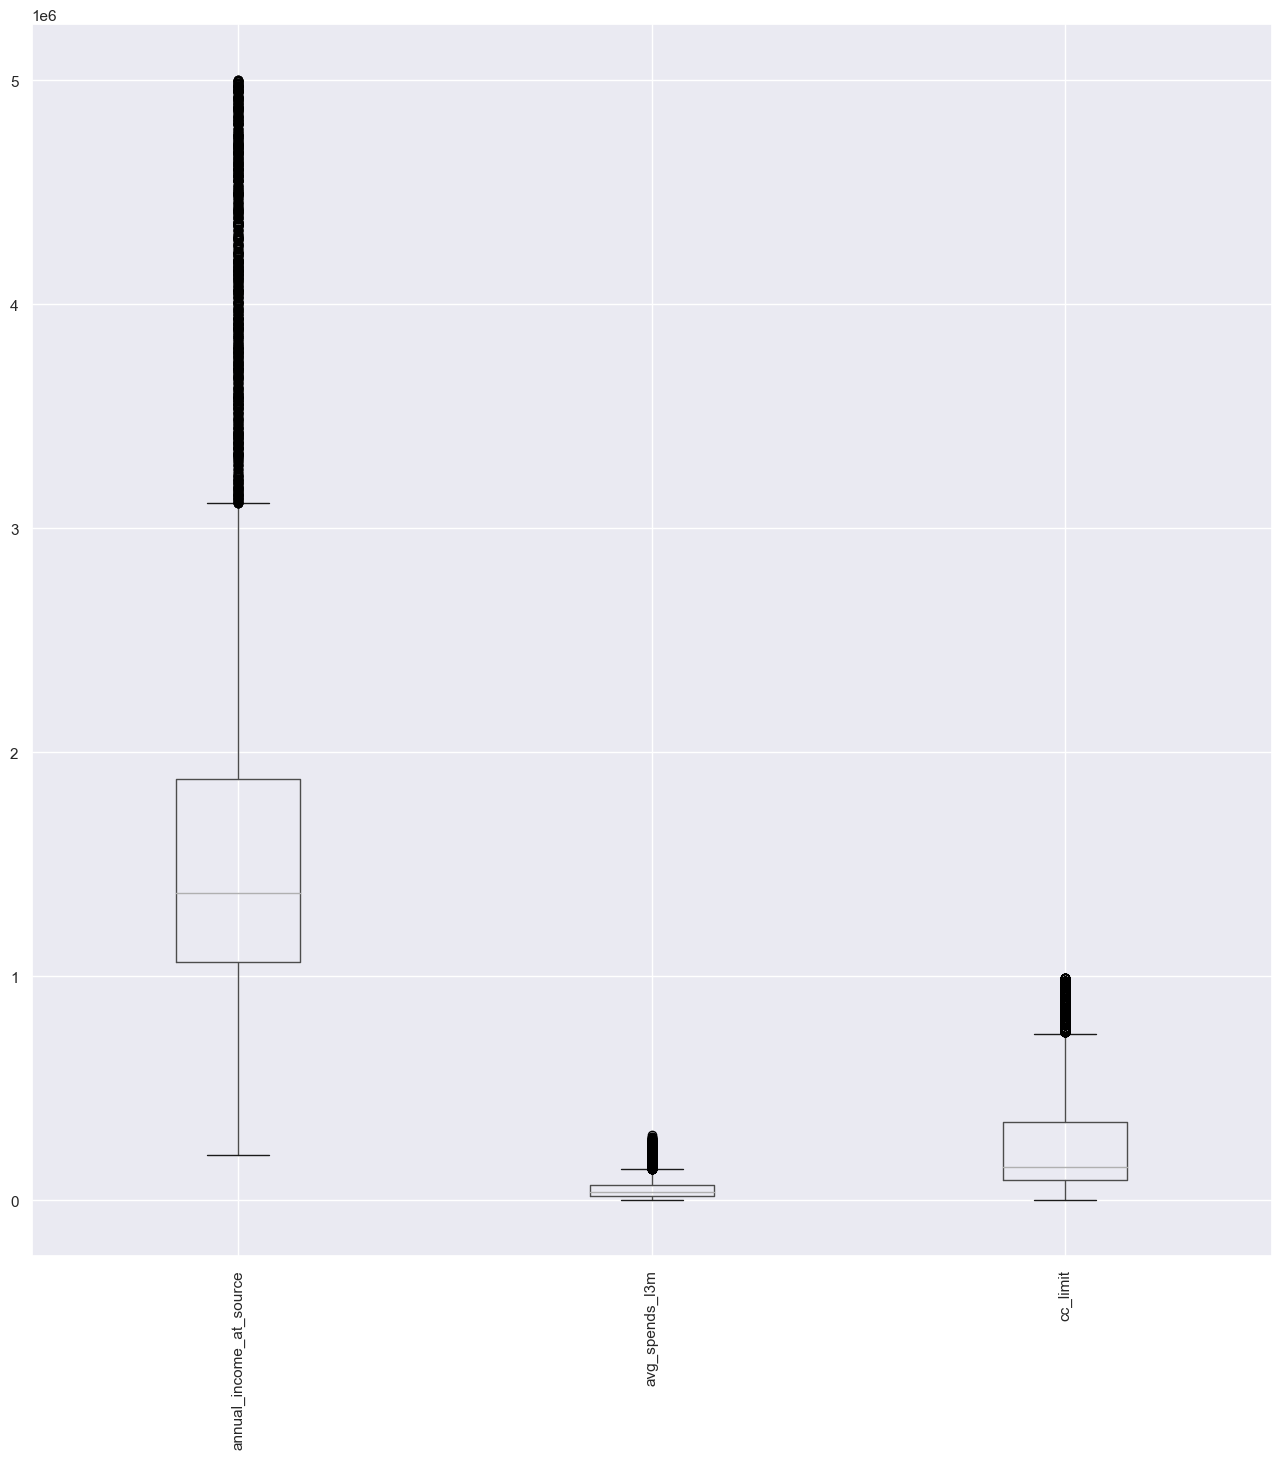

In [150]:
plt.figure(figsize=(16,16))
df_cc.boxplot(column=['annual_income_at_source','avg_spends_l3m','cc_limit'])
plt.xticks(rotation=90)
plt.show()

## Visualization 

### Univariate Analysis

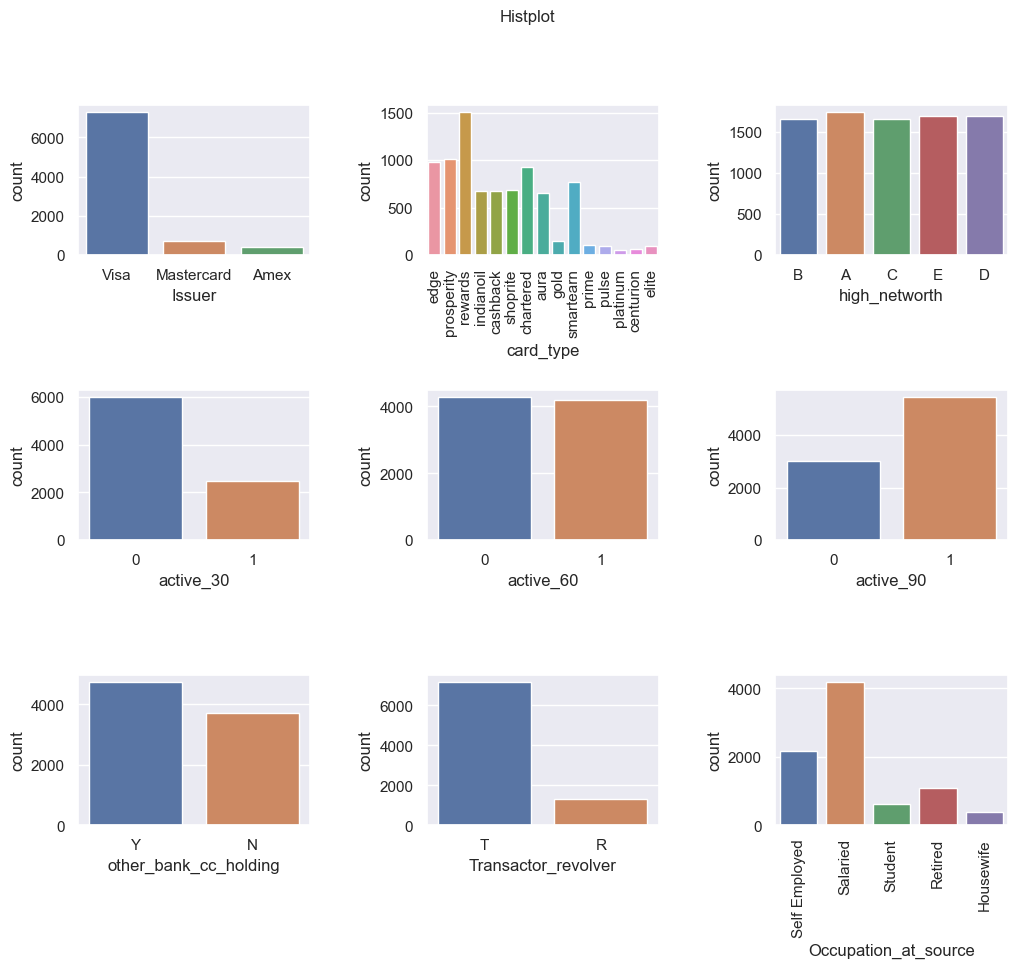

In [157]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.9, top=0.9, wspace= 0.5, bottom = 0.3)
fig.suptitle('Histplot', fontsize=12)
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)
ax7 = fig.add_subplot(3,3,7)
ax8 = fig.add_subplot(3,3,8)
ax9 = fig.add_subplot(3,3,9)

sns.countplot(data=df_cc, x='Issuer', ax= ax1);
sns.countplot(data=df_cc, x='card_type', ax= ax2);
sns.countplot(data=df_cc, x='high_networth', ax= ax3);
sns.countplot(data=df_cc, x='active_30', ax= ax4);
sns.countplot(data=df_cc, x='active_60', ax= ax5);
sns.countplot(data=df_cc, x='active_90', ax= ax6);
sns.countplot(data=df_cc, x='other_bank_cc_holding', ax= ax7);
sns.countplot(data=df_cc, x='Transactor_revolver', ax= ax8);
sns.countplot(data=df_cc, x='Occupation_at_source', ax= ax9);

ax2.tick_params(axis='x', rotation=90)
ax9.tick_params(axis='x', rotation=90)

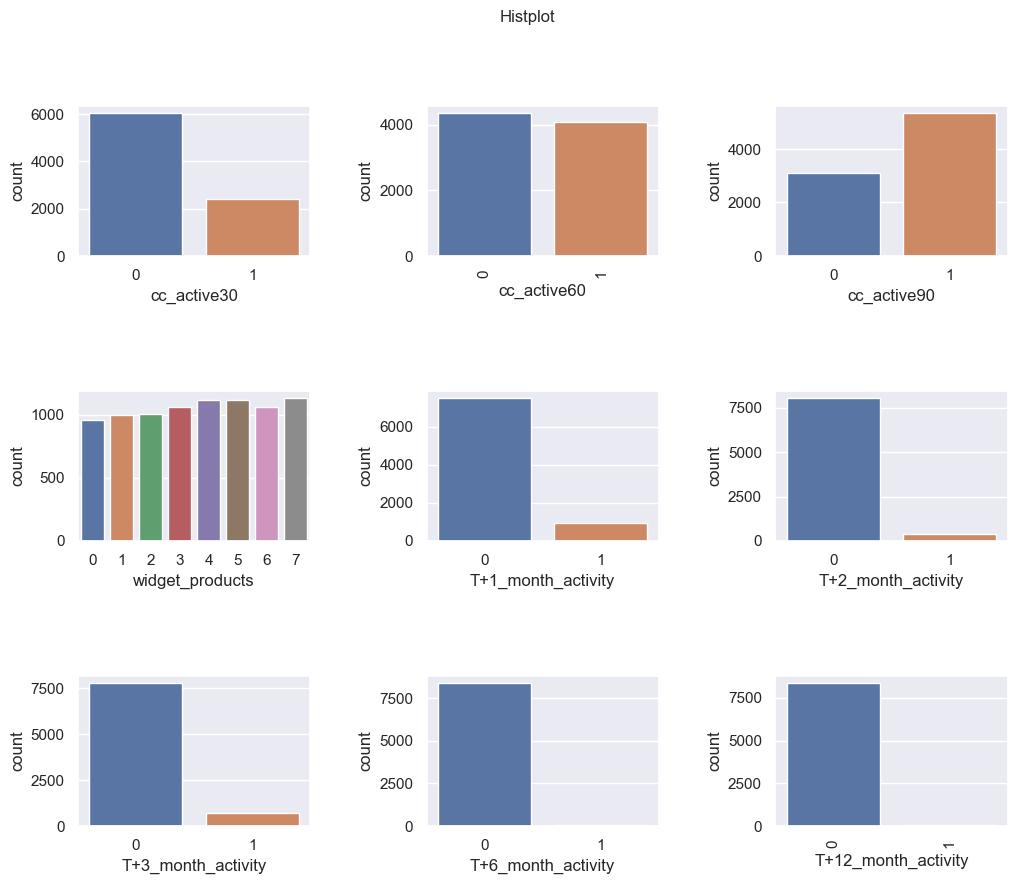

In [160]:
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(hspace=0.9, top=0.9, wspace= 0.5, bottom = 0.3)
fig.suptitle('Histplot', fontsize=12)
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)
ax7 = fig.add_subplot(3,3,7)
ax8 = fig.add_subplot(3,3,8)
ax9 = fig.add_subplot(3,3,9)

sns.countplot(data=df_cc, x='cc_active30', ax= ax1);
sns.countplot(data=df_cc, x='cc_active60', ax= ax2);
sns.countplot(data=df_cc, x='cc_active90', ax= ax3);
sns.countplot(data=df_cc, x='widget_products', ax= ax4);
sns.countplot(data=df_cc, x='T+1_month_activity', ax= ax5);
sns.countplot(data=df_cc, x='T+2_month_activity', ax= ax6);
sns.countplot(data=df_cc, x='T+3_month_activity', ax= ax7);
sns.countplot(data=df_cc, x='T+6_month_activity', ax= ax8);
sns.countplot(data=df_cc, x='T+12_month_activity', ax= ax9);

ax2.tick_params(axis='x', rotation=90)
ax9.tick_params(axis='x', rotation=90)

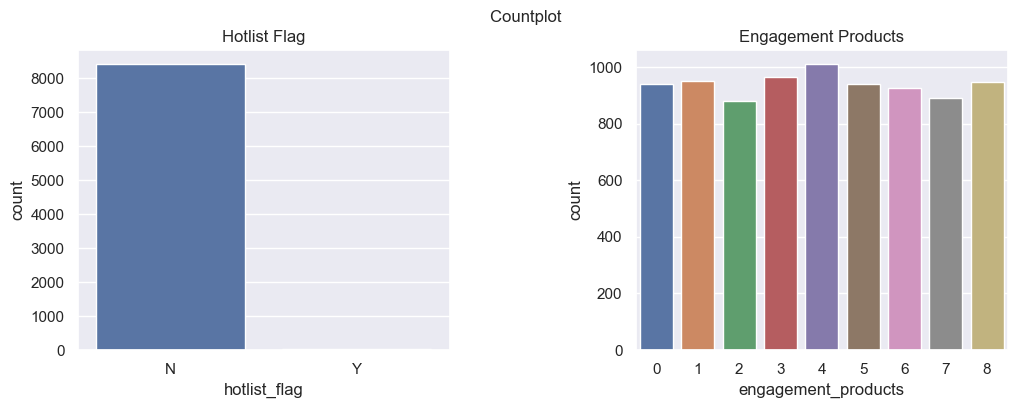

In [163]:
fig = plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=0.6, top=0.9, wspace= 0.5, bottom = 0.3)
fig.suptitle('Countplot ', fontsize=12)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.countplot(data=df_cc, x ='hotlist_flag', ax= ax1,);
sns.countplot(data=df_cc, x ='engagement_products', ax= ax2);

ax1.title.set_text("Hotlist Flag")
ax2.title.set_text("Engagement Products")

<Figure size 600x500 with 0 Axes>

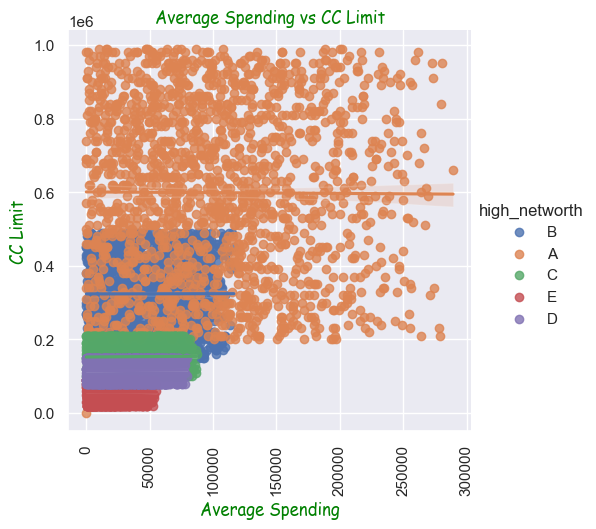

In [169]:
plt.figure(figsize=(6,5))
sns.set(font_scale=1)
font = {'family':'cursive','color':'green','size':12}
sns.lmplot(data=df_cc, x='avg_spends_l3m', y = 'cc_limit', hue='high_networth');
plt.title("Average Spending vs CC Limit",fontdict=font);
plt.xlabel("Average Spending",fontdict=font)
plt.ylabel("CC Limit",fontdict=font)
plt.xticks(rotation = 90)
plt.show();

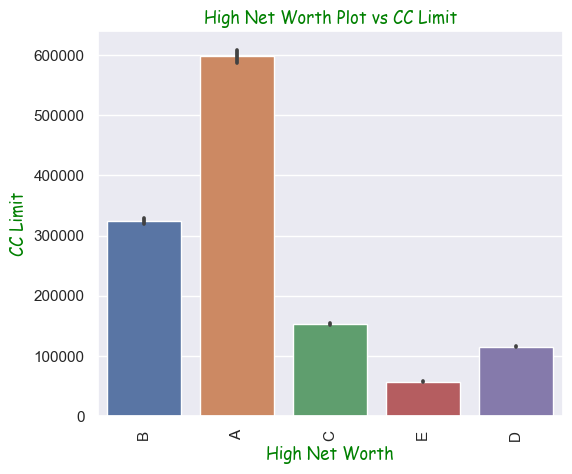

In [168]:
plt.figure(figsize=(6,5))
sns.set(font_scale=1)
font = {'family':'cursive','color':'green','size':12}
sns.barplot(data=df_cc, x='high_networth', y = 'cc_limit');
plt.title("High Net Worth Plot vs CC Limit",fontdict=font);
plt.xlabel("High Net Worth",fontdict=font)
plt.ylabel("CC Limit",fontdict=font)
plt.xticks(rotation = 90)
plt.show();

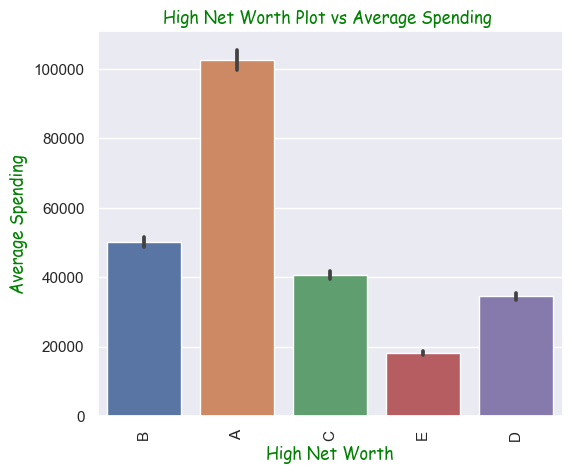

In [175]:
plt.figure(figsize=(6,5))
sns.set(font_scale=1)
font = {'family':'cursive','color':'green','size':12}
sns.barplot(data=df_cc, x='high_networth', y = 'avg_spends_l3m');
plt.title("High Net Worth Plot vs Average Spending ",fontdict=font);
plt.xlabel("High Net Worth",fontdict=font)
plt.ylabel("Average Spending",fontdict=font)
plt.xticks(rotation = 90)
plt.show();

### From the above 2 plots, we can suggest that the high net worth individuals have very high spending cc limits but a whole lot of it is unused as we can see in the graph that only one third of the cc limit have been utilized on average.

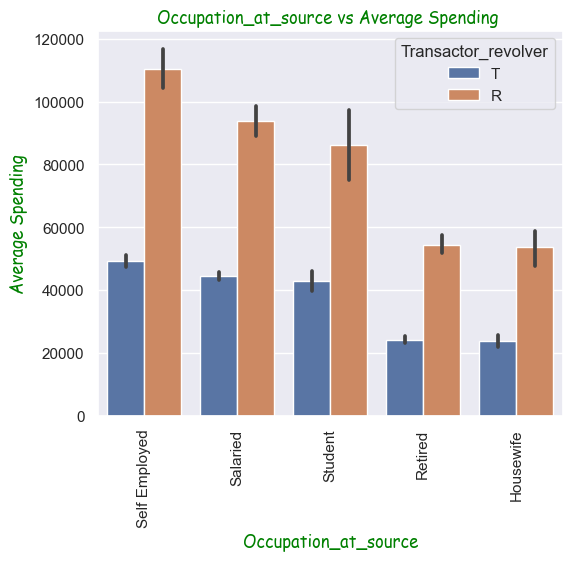

In [183]:
plt.figure(figsize=(6,5))
sns.set(font_scale=1)
font = {'family':'cursive','color':'green','size':12}
sns.barplot(data=df_cc, x='Occupation_at_source', y = 'avg_spends_l3m', hue='Transactor_revolver');
plt.title("Occupation_at_source vs Average Spending ",fontdict=font);
plt.xlabel("Occupation_at_source",fontdict=font)
plt.ylabel("Average Spending",fontdict=font)
plt.xticks(rotation = 90)
plt.show();

### This plot shows that the Self Employed and Salaried individuals have higher Average spending, but most of the candidates carries over the balances to the next month. And almost everyone carries over the balances to next month. So they are revolving customers.

### Business can try to offer certain loans or EMI on high value transactions so that revolving customers number can be brough down.

In [177]:
df_cc.corr().

,userid,card_bin_no,active_30,active_60,active_90,cc_active30,cc_active60,cc_active90,widget_products,engagement_products,annual_income_at_source,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,avg_spends_l3m,cc_limit
userid,1.000000,-0.012930,0.004826,-0.002638,-0.014598,0.003236,0.006785,0.013257,-0.011369,-0.004223,-0.014650,0.000638,0.013422,0.001757,-0.004524,-0.010698,-0.005915,-0.024494,-0.004585
card_bin_no,-0.012930,1.000000,-0.011735,-0.017988,-0.001044,0.002825,0.012942,0.007836,0.027682,-0.009099,0.003510,0.002812,0.003992,0.015344,-0.001485,-0.011072,-0.009868,0.006960,0.009024
active_30,0.004826,-0.011735,1.000000,0.649523,0.479956,0.008249,0.001719,-0.010189,0.038809,0.003332,-0.008852,-0.006061,0.365093,0.078675,0.052145,0.147238,0.152112,-0.007224,-0.007140
active_60,-0.002638,-0.017988,0.649523,1.000000,0.738936,0.006037,0.000861,0.002859,0.037084,-0.012785,-0.011502,-0.007405,0.236327,0.050544,0.027028,0.095634,0.098800,-0.013877,-0.004769
active_90,-0.014598,-0.001044,0.479956,0.738936,1.000000,0.016475,0.013887,0.018534,0.022866,0.001935,-0.015864,-0.000413,0.171547,0.045042,0.030017,0.070668,0.073007,-0.008428,-0.014645
cc_active30,0.003236,0.002825,0.008249,0.006037,0.016475,1.000000,0.649790,0.480340,-0.011778,0.012073,0.022643,0.016922,0.009978,0.053988,0.044509,0.150242,0.155215,0.009853,0.009937
cc_active60,0.006785,0.012942,0.001719,0.000861,0.013887,0.649790,1.000000,0.739223,0.012662,0.007859,0.012462,0.010927,0.009472,0.040777,0.033131,0.097626,0.100857,0.001417,0.004925
cc_active90,0.013257,0.007836,-0.010189,0.002859,0.018534,0.480340,0.739223,1.000000,0.025478,-0.001391,-0.001588,-0.004287,0.004373,0.033213,0.024057,0.072167,0.074556,-0.002644,-0.011132
widget_products,-0.011369,0.027682,0.038809,0.037084,0.022866,-0.011778,0.012662,0.025478,1.000000,-0.006497,-0.000581,0.021390,0.007169,0.017573,0.027716,0.043250,0.043463,0.005696,-0.000855
engagement_products,-0.004223,-0.009099,0.003332,-0.012785,0.001935,0.012073,0.007859,-0.001391,-0.006497,1.000000,0.026827,-0.015099,-0.011658,0.020594,0.015240,0.014555,0.014593,0.035294,0.025950


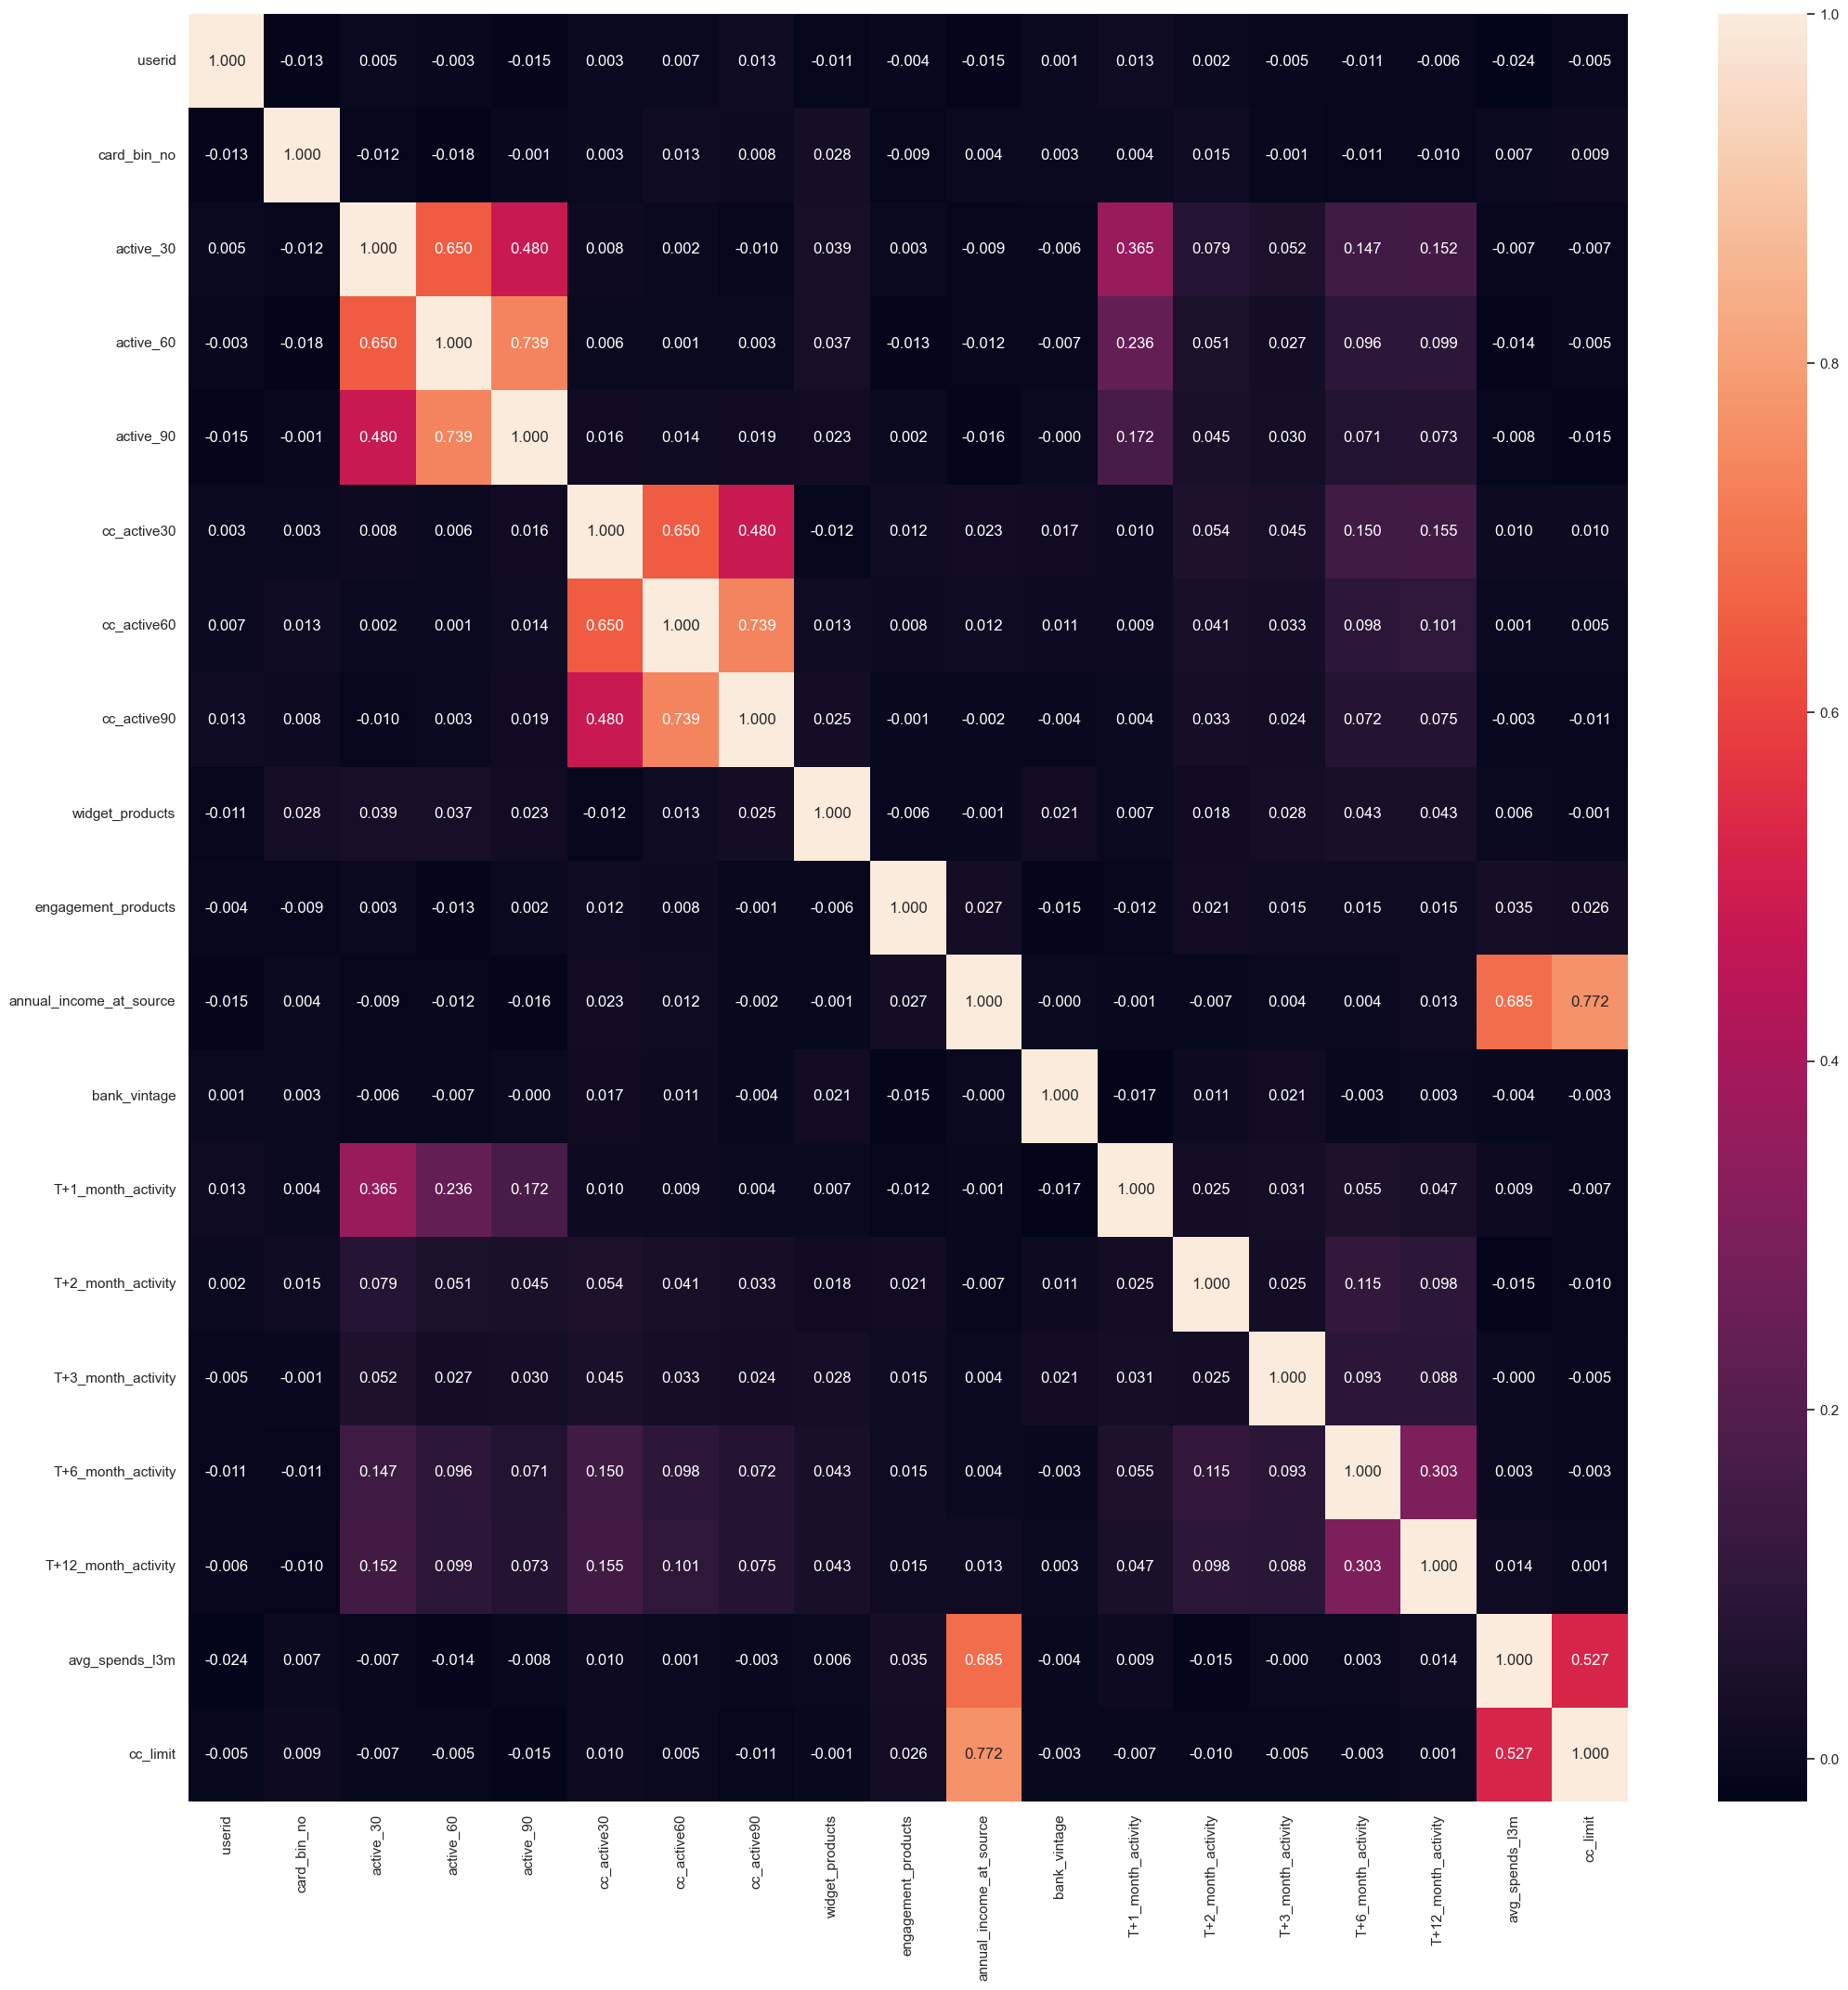

In [181]:
plt.figure(figsize=(25,25))
sns.heatmap(df_cc.corr(), annot=True, fmt='0.3f');

### The variable annual_income_at_source is higly correlated with avg_spends_l3m and cc_limit. So, Focusing more on these variables will give us more insights.

### The variable active_30, active_60 and active_90 seems to be correlated. These fields needs to be analyzed further with the value of transactions to putforth any insights

### Similarly, The variable cc_active30, cc_active60 and cc_active90 seems to have certain level of correlation. So, the value of transactions needs to be analyzed further to putforward insights